# Health Insurance Cross Sell Prediction

# Business Problem

## Goal
**Meningkatkan User Interested Rate sebesar 10%**

## Objective
- Memprediksi nasabah yang potensial untuk asuransi Kendaraan
- Menemukan faktor penting dan karakteristik utama dari user yang tertarik dengan asuransi kendaraan
- Menemukan metode apa yang membuat customer tertarik
- Meningkatkan jumlah orang yang tertarik dengan asuransi kendaraan
- Mengimplementasikan pada sebuah simulasi bisnis untuk melihat apakah model yang dibuat memberikan dampak yang positive untuk perusahaan Asuransi.

## Business Metrics
**User Interested Rate**

## Data Description<br>
- id: Unique ID for the customer
- Gender: Gender of the customer
- Age: Age of the customer
- Driving_License 0 : Customer does not have DL, 1 : Customer already has DL
- Region_Code: Unique code for the region of the customer
- Previously_Insured 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance
- Vehicle_Age: Age of the Vehicle
- Vehicle_Damage 1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.
- Annual_Premium: The amount customer needs to pay as premium in the year
- PolicySalesChannel: Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
- Vintage: Number of Days, Customer has been associated with the company
- Response 1 : Customer is interested, 0 : Customer is not interested

In [1]:
# Data Manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
%matplotlib inline

# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Normality test
from scipy.stats import chi2_contingency
from scipy.stats import shapiro
from scipy.stats import normaltest
import scipy.stats as st

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

#score_metrics & cross validation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, KFold

# Save and Load model
import pickle, os
os.makedirs('file_model', exist_ok=True)

# Ignore warning
import warnings
warnings.filterwarnings("ignore")

import IPython.display
from IPython.display import Image

**Import dataset**

In [2]:
df = pd.read_csv("train.csv")

# Exploratory Data Analysis

## 1. Descriptive Statistics

In [3]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


**Checking Columns Type and its detail**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


__Semua kolom yang tersedia sudah sesuai dengan seharusnya namun ada penyesuaian untuk tahap EDA dan Visualization__

**Checking Null Values**

In [5]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

**Tidak ada kolom yang memiliki nilai null, kita akan cek juga untuk nilai unik masing-masing kolom**

In [6]:
print('columns and number of unique values')
dict=[]
for i in df.columns:
    print(f'{i} -> {df[i].nunique()}')

columns and number of unique values
id -> 381109
Gender -> 2
Age -> 66
Driving_License -> 2
Region_Code -> 53
Previously_Insured -> 2
Vehicle_Age -> 3
Vehicle_Damage -> 2
Annual_Premium -> 48838
Policy_Sales_Channel -> 155
Vintage -> 290
Response -> 2


**Hasil Check:**
- Tidak ada data yang memiliki nilai null
- Semua tipe data sudah sesuai, namun perlu penyesuaian pada EDA dan Pre-Processing untuk Modelling
- Nilai unik pada kolom juga tidak memiliki suatu kejanggalan

**Merubah beberapa variabel yang seharusnya masuk pada Kategorik**

In [7]:
df[["id","Driving_License","Region_Code","Previously_Insured","Policy_Sales_Channel","Response"]]=df[["id","Driving_License","Region_Code","Previously_Insured","Policy_Sales_Channel","Response"]].astype(np.object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  object 
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  object 
 4   Region_Code           381109 non-null  object 
 5   Previously_Insured    381109 non-null  object 
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  object 
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 34.9+ MB


**Check descriptive statistics kolom numerical**

In [9]:
df.describe()

,Age,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000
mean,38.822584,30564.389581,154.347397
std,15.511611,17213.155057,83.671304
min,20.000000,2630.000000,10.000000
25%,25.000000,24405.000000,82.000000
50%,36.000000,31669.000000,154.000000
75%,49.000000,39400.000000,227.000000
max,85.000000,540165.000000,299.000000


**Check descriptive statistics kolom categorical**

In [10]:
df.describe(include=['object'])

,id,Gender,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Response
count,381109,381109,381109,381109.0,381109,381109,381109,381109.0,381109
unique,381109,2,2,53.0,2,3,2,155.0,2
top,1,Male,1,28.0,0,1-2 Year,Yes,152.0,0
freq,1,206089,380297,106415.0,206481,200316,192413,134784.0,334399


Tidak ada dominasi yang berlebih di antara tiap unique nilai pada kolom "Gender" dan "Vehicle_Damage".

In [11]:
df.Vehicle_Age.value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

Sedangkan pada kolom "Vehicle_Age" dominasi ada pada nilai "1-2 Year" dan "< 1 Year" dibandinkan dengan "> 2 Years" dengan perbedaan yang cukup signifikan

**Separating Categorical & Numerical Columns**

In [12]:
num = df.select_dtypes(include=[np.number])
cat = df.select_dtypes(exclude=[np.number])

numerical= num.columns
categorical = cat.columns 
print(numerical)
print(categorical)

Index(['Age', 'Annual_Premium', 'Vintage'], dtype='object')
Index(['id', 'Gender', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Response'],
      dtype='object')


## 2. Univariate Analysis

### a. KDE Plot (Numerical) Analysis

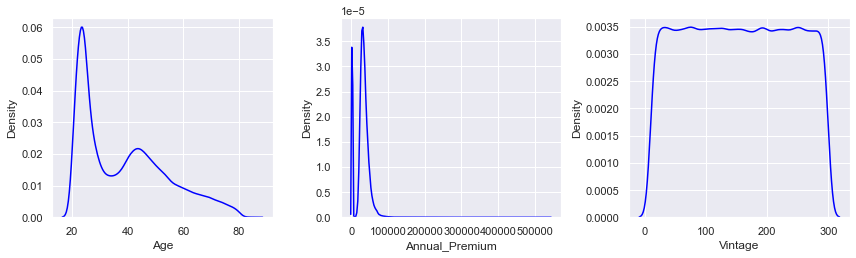

In [13]:
features = numerical
for i in range(0, len(features)):
    plt.rcParams['figure.figsize'] = (12,10)
    plt.subplot(3,3,i+1)
    sns.kdeplot(x=df[features[i]], color='blue')
    plt.xlabel(features[i])
    plt.tight_layout()

### b. Violin Plot Analysis

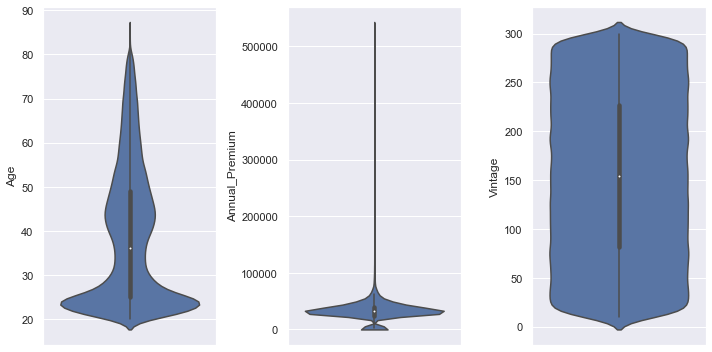

In [14]:
features = numerical
for i in range(0, len(features)):
    plt.rcParams['figure.figsize'] = (10,5)
    plt.subplot(1,len(features),i+1)
    sns.violinplot(y=df[features[i]])
    plt.tight_layout()    

**KDE Plot Analysis:**
Dapat kita lihat dari hasil visualisasi di atas bahwa rata-rata distribusi pada kolom Age adalah skewed positively 
Pada Annual_Premium, variabel tersebut memiliki distribusi bimodal dan ekornya cenderung ke arah kanan.

**Violin Plot Analysis:**
Pada violin plot chart nilai dengan outlier terbanyak ada pada kolom "Annual_Premium", pada kolom "Vintage" memiliki distribusi yang merata.

**Outlier pada variabel Annual_Premium:**

In [15]:
Q1 = df['Annual_Premium'].quantile(0.25)
Q3 = df['Annual_Premium'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
outlier = ~((df['Annual_Premium'] >= low_limit) & (df['Annual_Premium'] <= high_limit))
outlier_Annual_Premium = df[outlier]
outlier_Annual_Premium.shape

(10320, 12)

Total outlier pada variabel Annual_Premium adalah 10320 baris data 

### c. Countplot Analysis (Categorical)

In [16]:
fitur = cat.drop(['id','Region_Code','Policy_Sales_Channel'], axis=1).columns
fitur

Index(['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage', 'Response'],
      dtype='object')

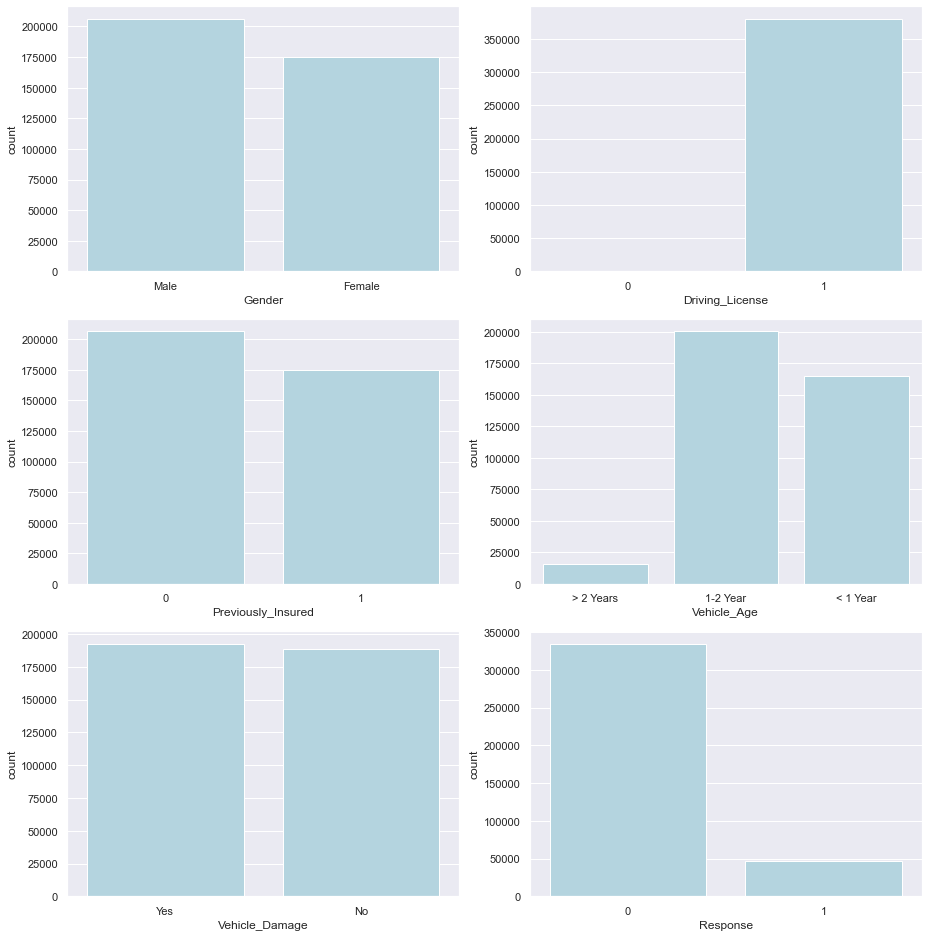

In [17]:
for i in range(0, len(fitur)):
    plt.rcParams['figure.figsize'] = (13,17)
    plt.subplot(4, 2, i+1)
    sns.countplot(x=df[fitur[i]], color='lightblue')
    plt.tight_layout()

**Countplot pada variabel yang memiliki kardinalitas tinggi**

Pada countplot dengan kardinalitas tinggi, akan diambil TOP 15 dan sisanya diganti dengan other

In [18]:
df_new = df.groupby(['Policy_Sales_Channel'])['id'].count().reset_index()
df_new = df_new.sort_values(by='id',ascending=False).head(15)
df_new.columns=['Policy_Sales_Channel','Frekuensi']
psc = df_new['Policy_Sales_Channel'].unique()
psc

list_segment = [] #membuat list kosong
for i, kolom in df.iterrows(): #melakukan iterasi pada setiap baris dataframe
    if kolom['Policy_Sales_Channel'] in psc:
        segment = df['Policy_Sales_Channel'][i]
    else:
        segment = 'Other'
    list_segment.append(segment) #menambahkan list kosong dari item tiap row
    
df['Top_Sales'] = list_segment

df_new = df.groupby(['Region_Code'])['id'].count().reset_index()
df_new = df_new.sort_values(by='id',ascending=False).head(15)
df_new.columns=['Region_Code','Frekuensi']
rc = df_new['Region_Code'].unique()
rc

list_segment = [] #membuat list kosong
for i, kolom in df.iterrows(): #melakukan iterasi pada setiap baris dataframe
    if kolom['Region_Code'] in rc:
        segment = df['Region_Code'][i]
    else:
        segment = 'Other'
    list_segment.append(segment) #menambahkan list kosong dari item tiap row
    
df['Top_Region'] = list_segment
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Top_Sales,Top_Region
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,26.0,28.0
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,26.0,3.0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,26.0,28.0
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,152.0,11.0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,152.0,41.0


In [19]:
df['Top_Region_Name']  = np.where(df['Top_Region']==28.0, "California",
                                  np.where(df['Top_Region']==8.0, "New York",
                                           np.where(df['Top_Region']==46.0, "Florida",
                                                    np.where(df['Top_Region']==41.0, "Texas",
                                                             np.where(df['Top_Region']==15.0, "New Jersey",
                                                                      np.where(df['Top_Region']==30.0, "Georgia",
                                                                               np.where(df['Top_Region']==29.0, "Illonois",
                                                                                       np.where(df['Top_Region']==50.0, "Michigan",
                                                                                                np.where(df['Top_Region']==3.0, "Penssylvania",
                                                                                                         np.where(df['Top_Region']==11.0, "North Carolina",
                                                                                                                  np.where(df['Top_Region']==36.0, "Tennessee",
                                                                                                                           np.where(df['Top_Region']==33.0, "Colorado",
                                                                                                                                    np.where(df['Top_Region']==47.0, "Arizona",
                                                                                                                                             np.where(df['Top_Region']==35.0, "Ohio",
                                                                                                                                                      np.where(df['Top_Region']=="Other", "Other", "Missouri")))))))))))))))



df['Top_Sales_Name']  = np.where(df['Top_Sales']==7.0, "Television",
                                  np.where(df['Top_Sales']==8.0, "Radio",
                                           np.where(df['Top_Sales']==13.0, "Independent Agent",
                                                    np.where(df['Top_Sales']==25.0, "Newspaper",
                                                             np.where(df['Top_Sales']==26.0, "Phone call",
                                                                      np.where(df['Top_Sales']==30.0, "Direct selling/offline store",
                                                                               np.where(df['Top_Sales']==122.0, "Iklan berbayar",
                                                                                        np.where(df['Top_Sales']==124.0, " Diskon, Promosi dan Big event",
                                                                                                 np.where(df['Top_Sales']==151.0, "Self Decision",
                                                                                                          np.where(df['Top_Sales']==152.0, "Pemasaran Media Sosial",
                                                                                                                   np.where(df['Top_Sales']==154.0, "SEO",
                                                                                                                            np.where(df['Top_Sales']==156.0, "Email Marketing",
                                                                                                                                     np.where(df['Top_Sales']==157.0, "Pemasaran Konten(informasi produk)",
                                                                                                                                              np.where(df['Top_Sales']==160.0, "Program Referal",
                                                                                                                                                      np.where(df['Top_Sales']=="Other", "Other", "Testimoni, Word out Mouth")))))))))))))))

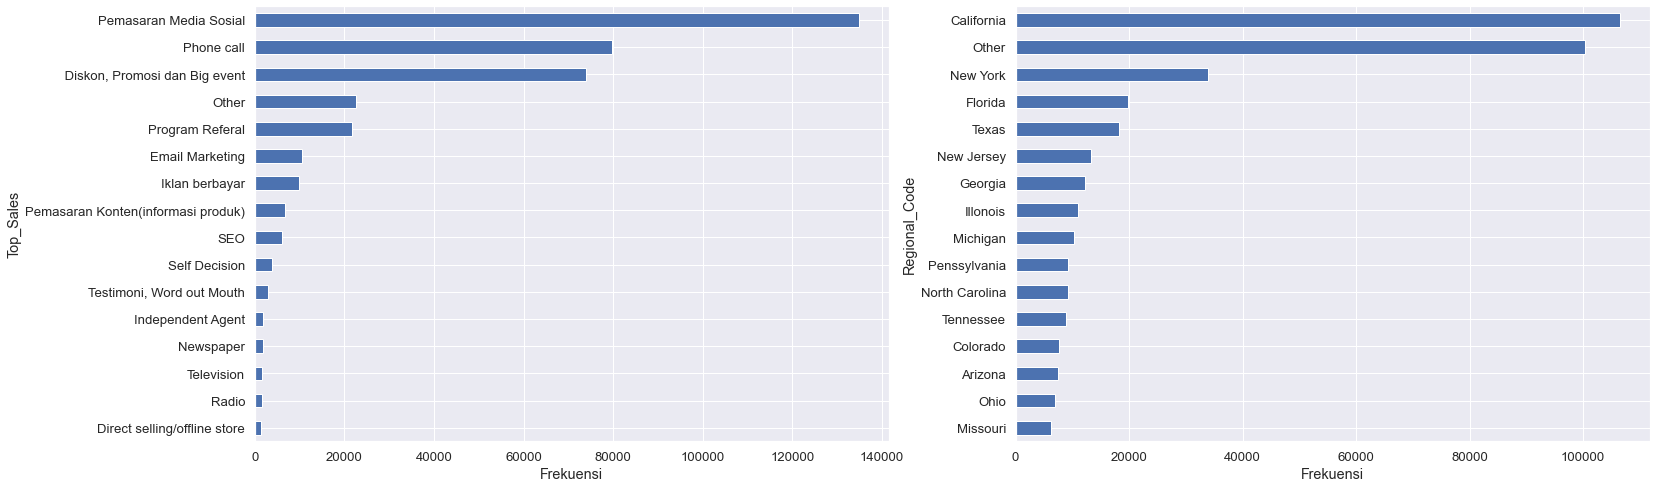

In [20]:
plt.rcParams['figure.figsize'] = (25,8)
sns.set(font_scale=1.2)
plt.subplot(1, 2, 1)
freqPolicy_Sales_Channel = df['Top_Sales_Name'].value_counts(ascending=True)
freqPolicy_Sales_Channel.plot(kind='barh')
plt.ylabel('Top_Sales')
plt.xlabel('Frekuensi')


plt.subplot(1, 2, 2)
freqRegional_Code = df['Top_Region_Name'].value_counts(ascending=True)
freqRegional_Code.plot(kind='barh')
plt.ylabel('Regional_Code')
plt.xlabel('Frekuensi')
plt.show()

**Countplot Analysis:** 
- Tidak ada nilai yang terlalu mendominasi pada kolom Gender, Vehicle_Damage, dan Previously_Insured.
- Kolom Vehicle_Age terdapat dua nilai yang mendominasi yaitu "1-2 Year", "<1 Year".
- Kolom Response sebagai Target dan kolom Driving_License juga memiliki satu nilai yang mendominasi.
- Ada 10 kode jenis Policy_Sales_Channel yang paling banyak dalam memberikan kontribusi ketertarikan nasabah menggunakan Asuransi Kendaraan. Top 3 diantaranya adalah dengan Phone Call, Diskon Promosi dan pemasaran melalui media sosial
- Nasabah di Region California, New York, Texas, Florida dan Illonois, banyak yang tertarik menggunakan Asuransi Kendaraan dibandingkan Region lain

**Follow Up untuk Pre-Processing**
- Melakukan handling outlier.
- Melakukan standarisasi pada kolom-kolom yang jauh dari distribusi normal.
- Melakukan feature encoding pada kolom yang berisi categorical.
- Melakukan class imbalance pada kolom yang memiliki nilai dominasi pada kolom Response sebagai Target pada case ini.
- Hanya mengambil top 10 atau top 15 dari kolom "Policy_Sales_Channel" dan kolom "Region Code" serta mengubah sisanya menjadi Others.

## 3. Multivariate Analysis

### a. Heatmap Analysis

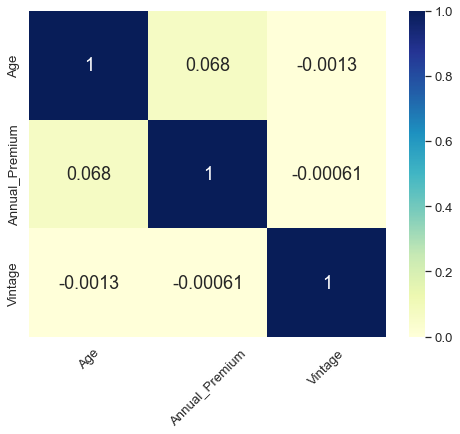

In [21]:
dfcorr = df[['Age','Annual_Premium','Vintage','Response']]
fig, ax = plt.subplots(figsize =(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(dfcorr.corr(),cmap="YlGnBu",annot=True,annot_kws={"size": 18},ax=ax)
plt.xticks(rotation = 45)
plt.show()

- Tidak ada variable yang memiliki korelasi kuat atau r >= 0.7 atau r <= -0.7
- Hanya variable Age dengan Policy_Sales_Channel yang memiliki korelasi yang cukup kuat
- Variabel Response dengan Previously_Insured memiliki korelasi > 0.3 namun cenderung lemah

### **Hasil Uji Statistik ANOVA dan Chi-Square**

In [22]:
yes_resp = df[df["Response"]==1]
no_resp = df[df["Response"]==0]
list=[]

for i in numerical:
    stat, p= st.f_oneway(yes_resp[i], no_resp[i])
    list.append(p)
list
print('Hasil Uji Statistik ANOVA :')
for i in range(0,len(numerical)):
    if list[i] > 0.05:
        result =  "Terima H0"
        print(result,numerical[i],'p-value',list[i])

    else:
        result =  "Terima H1"
        print(result,numerical[i],'p-value',list[i])   
        
from scipy.stats import chi2_contingency
list=[]

for i in categorical:
    ctab = pd.crosstab(df[i], df['Response'])
    stat, p, dof, expected = chi2_contingency(ctab)
    list.append(p)
list

print()
print('Hasil Uji Statistik Chi-Square :')
for i in range(0,9):
    if list[i] > 0.05:
        result =  "Terima H0"
        print(result,categorical[i],'p-value',list[i])

    else:
        result =  "Terima H1"
        print(result,categorical[i],'p-value',list[i])

Hasil Uji Statistik ANOVA :
Terima H1 Age p-value 0.0
Terima H1 Annual_Premium p-value 3.722315140370128e-44
Terima H0 Vintage p-value 0.5167036522730712

Hasil Uji Statistik Chi-Square :
Terima H0 id p-value 0.4992384134296765
Terima H1 Gender p-value 7.665800628415621e-230
Terima H1 Driving_License p-value 5.111753504019177e-10
Terima H1 Region_Code p-value 0.0
Terima H1 Previously_Insured p-value 0.0
Terima H1 Vehicle_Age p-value 0.0
Terima H1 Vehicle_Damage p-value 0.0
Terima H1 Policy_Sales_Channel p-value 0.0
Terima H1 Response p-value 0.0


Kesimpulan dari hasil uji statistik (ANOVA): 

Terima H0 : Tidak cukup bukti untuk menyatakan bahwa variabel-variabel yang diuji mempengaruhi nasabah untuk tertarik menggunakan asuransi Kendaraan<br>
Terima H1 : Cukup bukti untuk menyatakan bahwa variabel-variabel yang diuji berpengaruh terhadap ketertarikan nasabah untuk menggunakan asuransi Kendaraan

Kesimpulan dari hasil uji statistik (Chi-Square): 

Terima H0 : Tidak cukup bukti untuk menyatakan bahwa variabel-variabel yang diuji memiliki hubungan dengan variabel Response mengenai ketertarikan menggunakan asuransi Kendaraan<br>
Terima H1 : Cukup bukti untuk menyatakan bahwa variabel-variabel yang diuji memiliki hubungan dengan variabel Response mengenai ketertarikan menggunakan asuransi Kendaraan

Kemudian akan diukur hubungan/korelasi antara variabel-variabel kategorik yang diujikan dengan variabel Response (Output sinifikan memiliki korelasi)

In [23]:
list=[]
categorical = ['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel']
for i in categorical:
    ctab = pd.crosstab(df[i], df['Response'])
    ctab = ctab.to_numpy()
    X2 = chi2_contingency(ctab, correction=False)[0]
    N = np.sum(ctab)
    minimum_dimension = min(ctab.shape)-1
    # Calculate Cramer's V
    result = np.sqrt((X2/N) / minimum_dimension)
    list.append(result)       
list

data = pd.DataFrame(list).T

data.columns = categorical

In [24]:
cramers_V = data.transpose()
cramers_V.columns = ['Correlation with Response']
cramers_V.sort_values(by=['Correlation with Response'], ascending=False)

,Correlation with Response
Vehicle_Damage,0.354400
Previously_Insured,0.341170
Policy_Sales_Channel,0.263429
Vehicle_Age,0.221937
Region_Code,0.138095
Gender,0.052440
Driving_License,0.010155


korelasi kolom kategorikal yang tinggi ada pada kolom vehicle_damage dan previously_insured

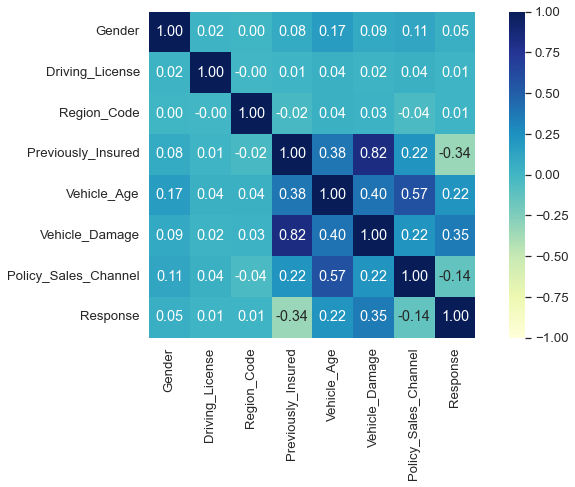

In [25]:
from dython.nominal import associations
# Instantiate a figure and axis object
categorical = ['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel','Response']
df_corr = df[categorical]
fig, ax = plt.subplots(figsize =(12, 6))
sns.set(font_scale=1.2)
# Estimate and generate Cramer's V association plot
cramers_v = associations(df_corr, nom_nom_assoc = 'cramer',cmap = "YlGnBu", ax=ax)

plt.show()

In [26]:
print("Memisahkan Variabel Independet dan Dependent")
print()

dependent = df.drop(['id','Vintage'],axis=1)
dependent.columns

independent = df[['id','Vintage']]
independent.columns
print(dependent.columns)
print(independent.columns)

Memisahkan Variabel Independet dan Dependent

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Response', 'Top_Sales', 'Top_Region',
       'Top_Region_Name', 'Top_Sales_Name'],
      dtype='object')
Index(['id', 'Vintage'], dtype='object')


Fitur yang akan digunakan untuk modelling adalah feature/variabel yang dependent 

### b. Boxplot Analysis

<AxesSubplot:xlabel='Vehicle_Damage', ylabel='Vintage'>

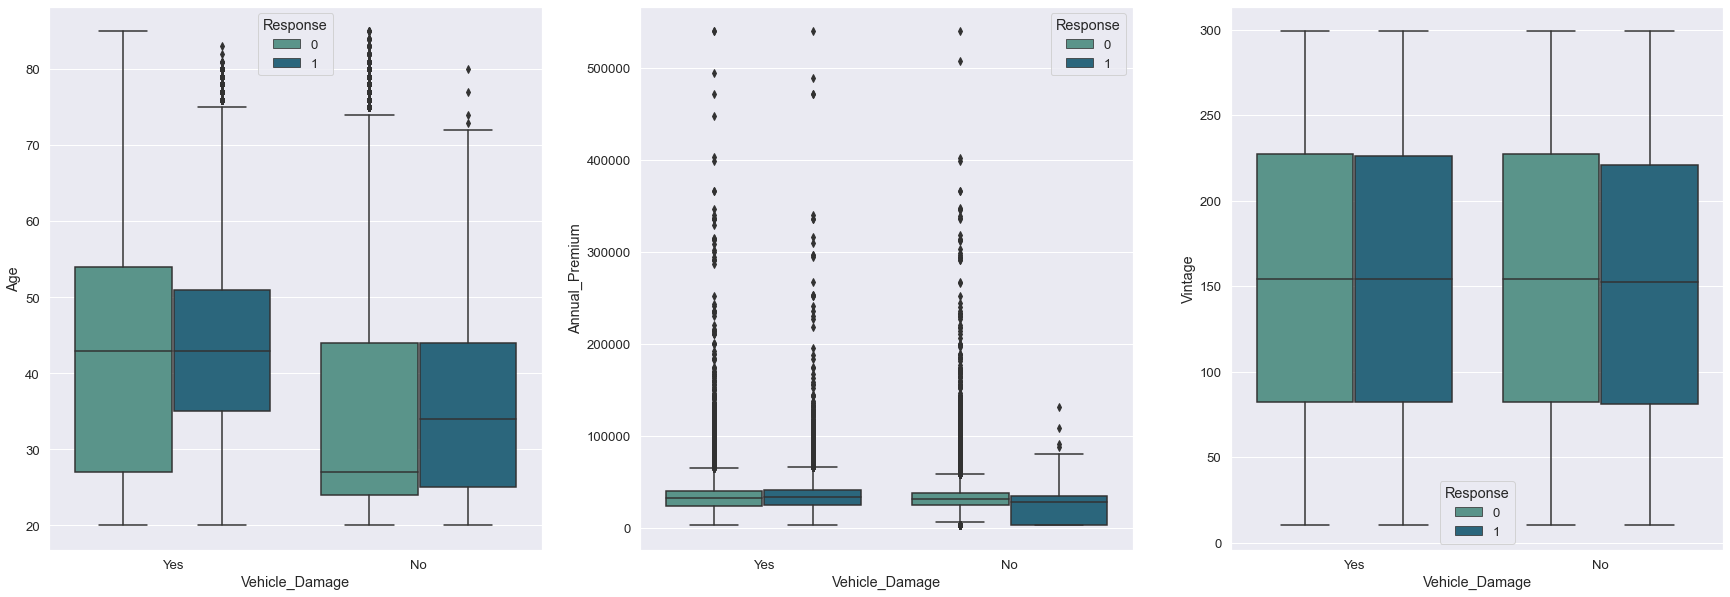

In [27]:
fig = plt.figure(figsize=(30,10))

plt.subplot(1, 3, 1)
sns.boxplot(data=df, x="Vehicle_Damage", y="Age", hue='Response',dodge=True, palette='crest')

plt.subplot(1, 3, 2)
sns.boxplot(data=df, x="Vehicle_Damage", y="Annual_Premium", hue='Response',dodge=True, palette='crest')

plt.subplot(1, 3, 3)
sns.boxplot(data=df, x="Vehicle_Damage", y="Vintage", hue='Response',dodge=True, palette='crest')

- Pada variable Age dapat dilihat yang tidak memiliki Vehicle_Damage baik yang merespon Yes dan No untuk asuransi kendaraan memiliki kelompok rentang umur yang hampir sama. Pada kelompok yang memiliki Vehicle_Damage dan merespon Yes berada pada rentang umur 33-52 tahun.
- Vehicle_Damage terhadap Annual_Premium memiliki distribusi yang cenderung hampir sama dengan tetap memiliki banyak nilai Outliers.
- Vehicle_Damage terhadap Vintage juga memiliki distribusi yang cenderung sama untuk keseluruhannya.

<AxesSubplot:xlabel='Gender', ylabel='Vintage'>

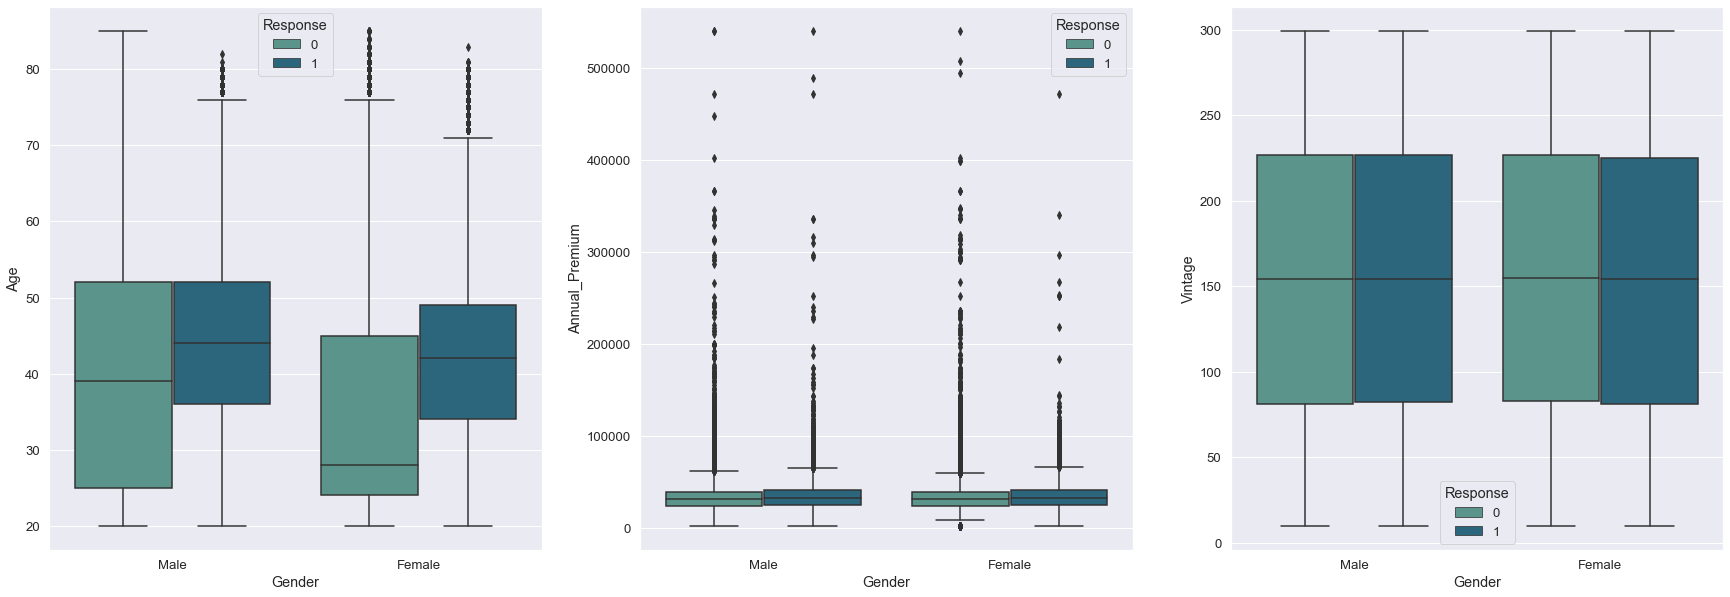

In [28]:
fig = plt.figure(figsize=(30,10))

plt.subplot(1, 3, 1)
sns.boxplot(data=df, x="Gender", y="Age", hue='Response',dodge=True, palette='crest')

plt.subplot(1, 3, 2)
sns.boxplot(data=df, x="Gender", y="Annual_Premium", hue='Response',dodge=True, palette='crest')

plt.subplot(1, 3, 3)
sns.boxplot(data=df, x="Gender", y="Vintage", hue='Response',dodge=True, palette='crest')

- Gender Male yang menolak Asuransi rentang umurnya lebih luas dibandingkan dengan Gender Female. Untuk respon Yes terhadap asuransi Kendaraan kedua Gender memiliki rentang umur yang cenderung sama.

<AxesSubplot:xlabel='Vehicle_Age', ylabel='Vintage'>

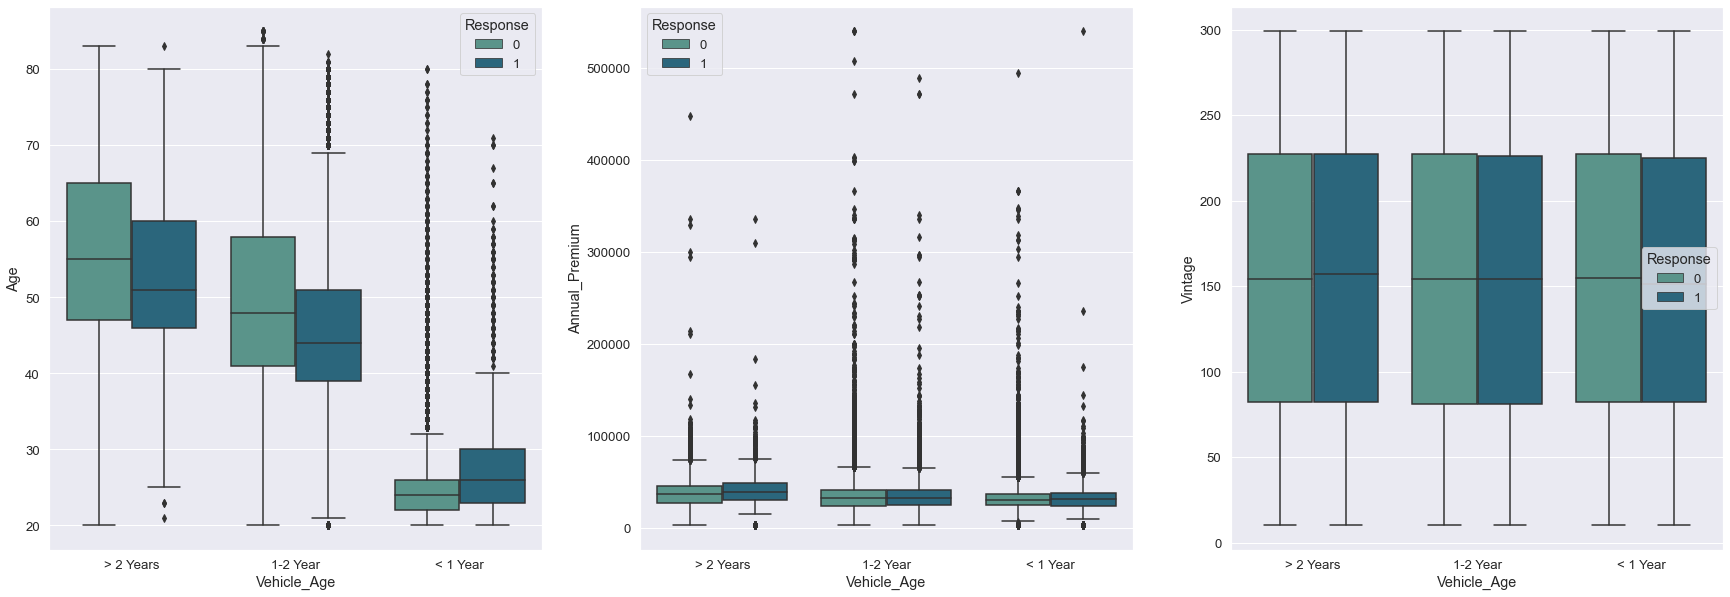

In [29]:
fig = plt.figure(figsize=(30,10))

plt.subplot(1, 3, 1)
sns.boxplot(data=df, x="Vehicle_Age", y="Age", hue='Response',dodge=True, palette='crest')

plt.subplot(1, 3, 2)
sns.boxplot(data=df, x="Vehicle_Age", y="Annual_Premium", hue='Response',dodge=True, palette='crest')

plt.subplot(1, 3, 3)
sns.boxplot(data=df, x="Vehicle_Age", y="Vintage", hue='Response',dodge=True, palette='crest')

- Umur kendaraan > 2 Years didominasi oleh customer dengan rentang umur 47 - 65 Tahun, sedangkan umur kendaraan di bawah 1 Tahun dimiliki oleh kelompok rentang umur termuda yaitu 23 - 31 Tahun.
- Umur kendaraan terhadap Annual Premium dan Vintage tidak memiliki perbedaan signifikan jika dilihat dari perbandingan dengan variabel-variabel sebelumnya.

## 4. Business Insight

Frekuensi beberapa variabel kategorik terhadap variabel Response


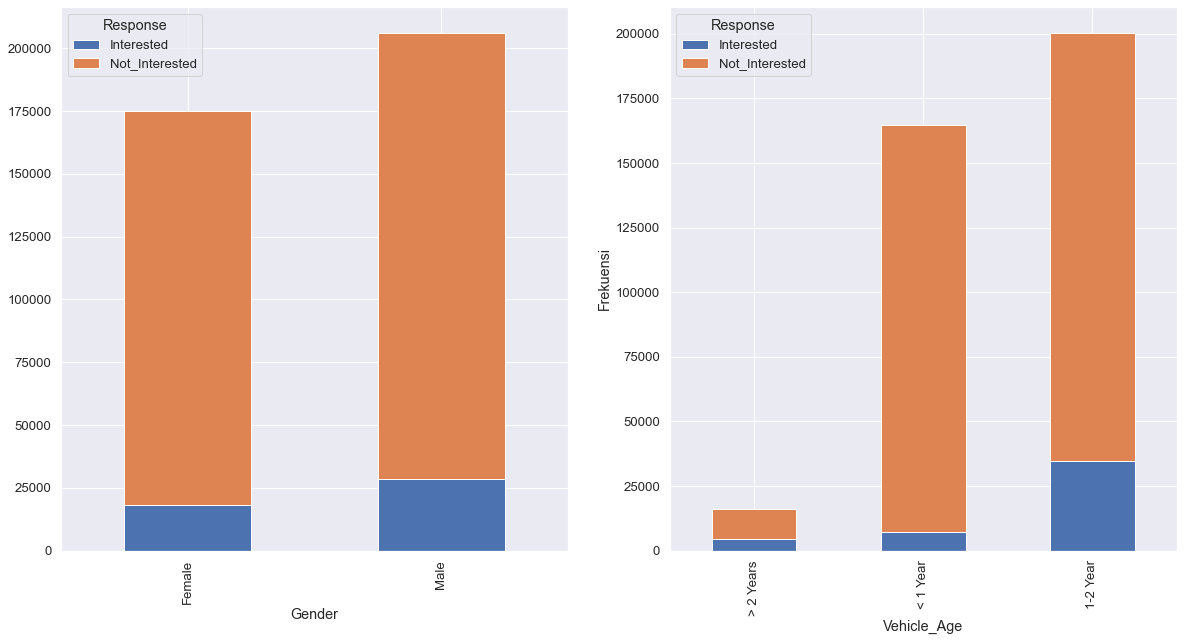

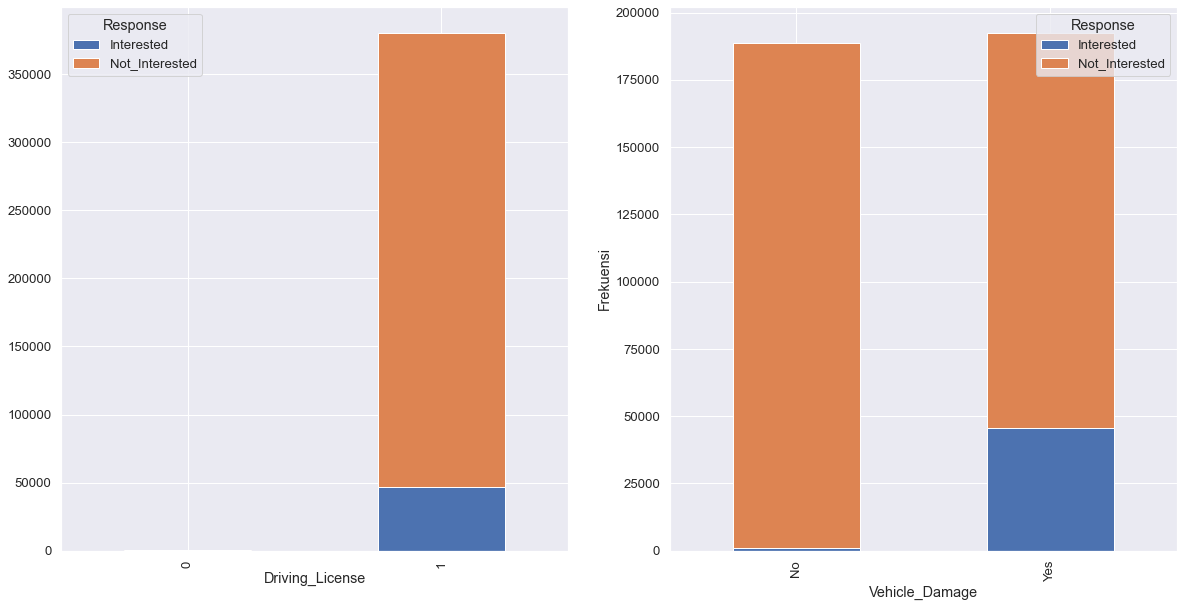

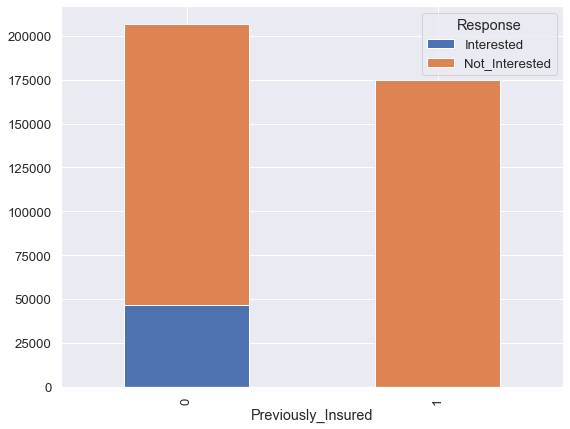

In [30]:
fitur = ['Gender','Vehicle_Age','Driving_License','Vehicle_Damage','Previously_Insured']
df_fitur = df.copy()
df_fitur['Response_insurance'] = np.where(df_fitur['Response']==1,'Interested','Not_Interested')
df_fitur = df_fitur.drop('Response', axis=1)
df_fitur.columns = ['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Top_Sales',
       'Top_Region', 'Top_Region_Name', 'Top_Sales_Name', 'Response']
#gender
df_gender = df_fitur[['Gender','Response']]
cross_tab = pd.crosstab(columns=df_fitur['Response'],
                        index=df_fitur['Gender'])
cross_tab = cross_tab.sort_values("Interested", axis=0, ascending=True)

#vehicle_age
df_va = df_fitur[['Vehicle_Age','Response']]
cross_tab1 = pd.crosstab(columns=df_fitur['Response'],
                        index=df_fitur['Vehicle_Age'])
cross_tab1 = cross_tab1.sort_values("Interested", axis=0, ascending=True)

#driving_license
df_dl = df_fitur[['Driving_License','Response']]
cross_tab2 = pd.crosstab(columns=df_fitur['Response'],
                        index=df_fitur['Driving_License'])
cross_tab2 = cross_tab2.sort_values("Interested", axis=0, ascending=True)

#vehicle damage
df_vd = df_fitur[['Vehicle_Damage','Response']]
cross_tab3 = pd.crosstab(columns=df_fitur['Response'],
                        index=df_fitur['Vehicle_Damage'])
cross_tab3 = cross_tab3.sort_values("Interested", axis=0, ascending=True)

#Previously_Insured
df_pi = df_fitur[['Previously_Insured','Response']]
cross_tab4 = pd.crosstab(columns=df_fitur['Response'],
                        index=df_fitur['Previously_Insured'])
cross_tab4 = cross_tab4.sort_values("Interested", axis=0, ascending=True)

print("Frekuensi beberapa variabel kategorik terhadap variabel Response")
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, sharex=False)


cross_tab.plot(ax=ax1, kind='bar', stacked=True, figsize=(20, 10))
plt.ylabel("Frekuensi")
cross_tab1.plot(ax=ax2, kind='bar', stacked=True, figsize=(20, 10))
plt.ylabel("Frekuensi")

plt.show()

fig, ((ax3, ax4)) = plt.subplots(nrows=1, ncols=2, sharex=False)

cross_tab2.plot(ax=ax3, kind='bar', stacked=True, figsize=(20, 10))
plt.ylabel("Frekuensi")
cross_tab3.plot(ax=ax4, kind='bar', stacked=True, figsize=(20, 10))
plt.ylabel("Frekuensi")
plt.show()

ax = df_fitur.groupby('Previously_Insured')['Response'].value_counts().unstack(level=1).plot.bar(stacked=True, figsize=(9, 7))
plt.show()

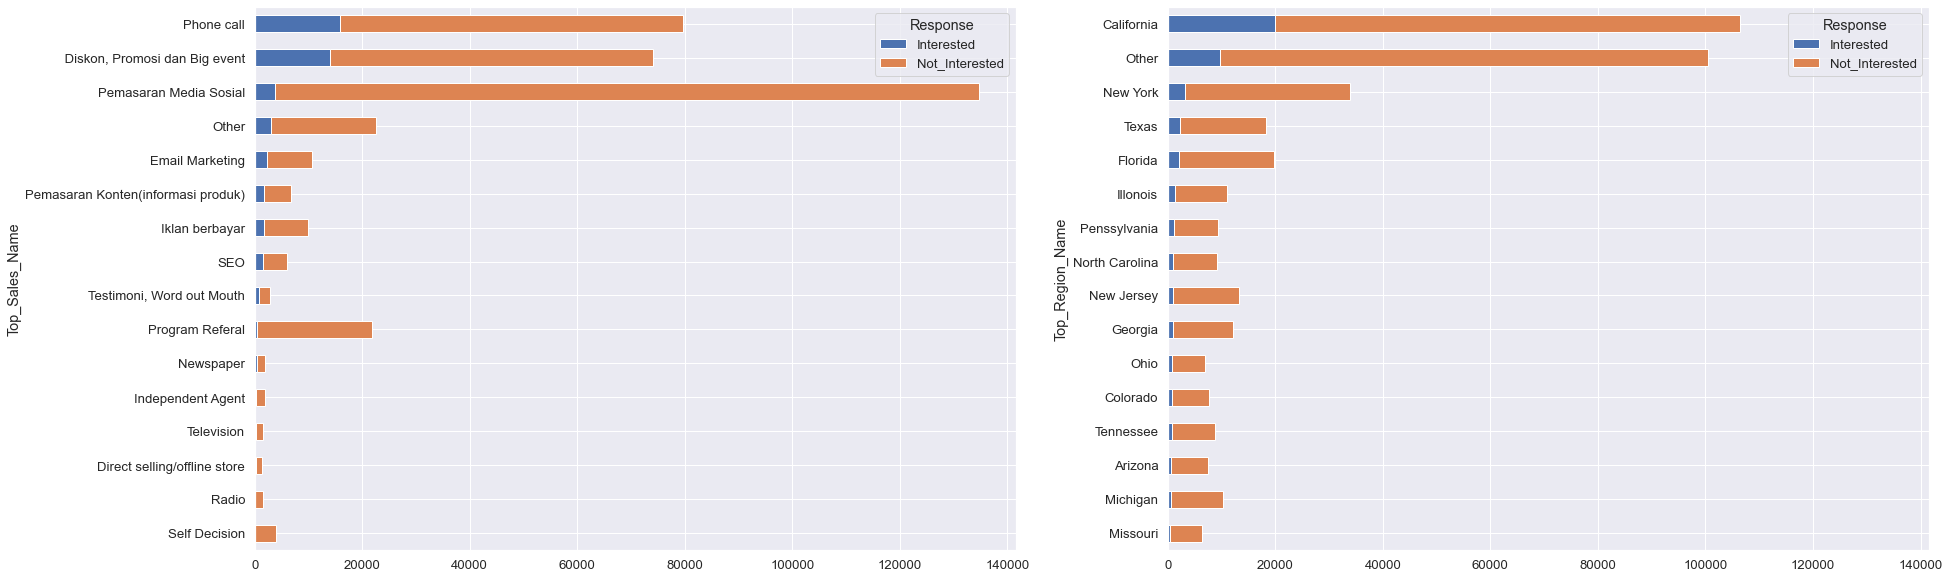

In [31]:
df_baru = df[['Top_Sales_Name','Response']]
df_baru['Response_insurance'] = np.where(df_baru['Response']==1,'Interested','Not_Interested')
df_baru = df_baru.drop('Response', axis=1)
df_baru.columns = ['Top_Sales_Name', 'Response']
df_baru
cross_tab = pd.crosstab(columns=df_baru['Response'],
                        index=df_baru['Top_Sales_Name'])
cross_tab = cross_tab.sort_values("Interested", axis=0, ascending=True)
cross_tab

df_baru1 = df[['Top_Region_Name','Response']]
df_baru1['Response_insurance'] = np.where(df_baru1['Response']==1,'Interested','Not_Interested')
df_baru1 = df_baru1.drop('Response', axis=1)
df_baru1.columns = ['Top_Region_Name', 'Response']
df_baru1
cross_tab1 = pd.crosstab(columns=df_baru1['Response'],
                        index=df_baru1['Top_Region_Name'])
cross_tab1 = cross_tab1.sort_values("Interested", axis=0, ascending=True)
cross_tab1

fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, sharex=True)

cross_tab.plot(ax=ax1, kind='barh', stacked=True, figsize=(30, 10))
ax.set_ylabel("Top_Sales", fontsize=30)
ax.set_xlabel("Frekuensi", fontsize=30)
cross_tab1.plot(ax=ax2, kind='barh', stacked=True, figsize=(30, 10))
ax.set_ylabel("Top_Region", fontsize=30)
ax.set_xlabel("Frekuensi", fontsize=30)
plt.show()

Text(0.5, 1.0, 'Customer Age Distribution')

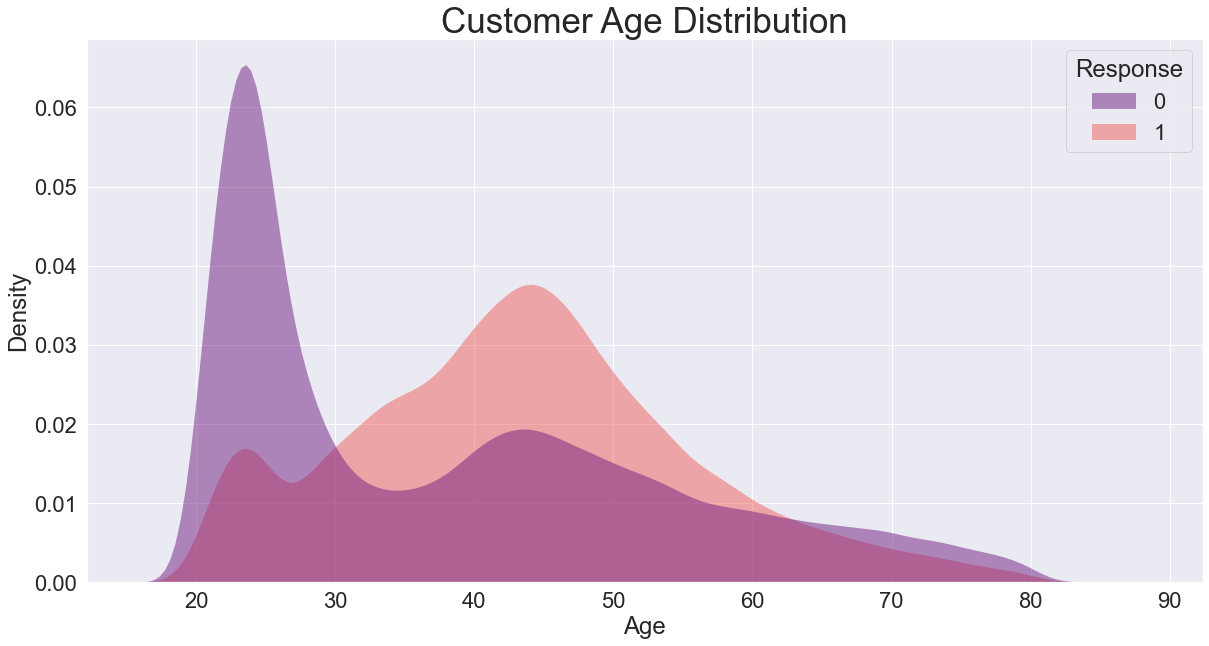

In [32]:
plt.rcParams['figure.figsize'] = (20,10)
sns.set(font_scale=2)
sns.kdeplot(data=df, x="Age", hue="Response",fill=True, common_norm=False, palette="magma",alpha=.5, linewidth=0,)
plt.title("Customer Age Distribution", fontsize=35)

### Business Insigth

- Pada nasabah yang tertarik menggunakan Asuransi Kendaraan, kondisi kendaraan sebelumnya lebih banyak yang telah mengalami kerusakan dibandingkan yang belum. 

- Nasabah yang tertarik menggunakan Asuransi Kendaraan baik Male maupun Female tidak terdapat perbedaan yang signifikan.

- Pada kelompok usia kendaraan 1-2 tahun lebih banyak yang tertarik menggunakan asuransi Kendaraan dibandingkan kelompok lain seperti kelompok usia kendaraan <1 tahun dan usia kendaran >2 tahun

- Nasabah yang tertarik menggunakan Asuransi kendaraan, sebelumnya banyak yang belum menggunakan Asuransi Kendaraan.

- Ada 10 kode jenis Policy_Sales_Channel yang paling banyak dalam memberikan kontribusi ketertarikan nasabah menggunakan Asuransi Kendaraan.

- Usia Nasabah dari 33 – 52 merupakan kelompok umur yang paling banyak tertarik menggunakan Asuransi Kendaraan.

- Ada beberapa Region seperti Region California, New York, Texas, Florida dan Illonois, dimana wilayah tersebut nasabah yang tertarik menggunakan Asuransi Kendaraan lebih banyak dibandingkan Region lain.

#### Rekomendasi Bisnis untuk Perusahaan Asuransi:
Perusahaan dapat memfokuskan pada kategori-kategori tersebut untuk menarik nasabah agar lebih banyak yang tertarik menggunakan Asuransi Kendaraan dengan menggunakan strategi yaitu:
1. Menggunakan top 10 jenis Policy_Sales_Channel sebagai media promosinya.
2. Perusahaan dapat memfokuskan pada beberapa Region yang memiliki nasabah dengan ketertarikan Asuransi Kendaraan paling banyak dibandingkan Region lain.
3. Memfokuskan promosi ke user dengan rentang umur 33-52 tahun dan pernah mengalami kerusakan pada kendaraannya serta umur kendaraannya berada pada 1-2 tahun.


# Data Preprocessing

## 1. Handling Missing Value dan Duplicated Data

In [33]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
Top_Sales               0
Top_Region              0
Top_Region_Name         0
Top_Sales_Name          0
dtype: int64

In [34]:
df.duplicated().sum()

0

Dapat kita lihat dari hasil coding di atas bahwasanya data tidak memiliki missing values maupun duplicated data sehingga tidak perlu diinput atau didrop data duplikatnya. Kita bisa langsung menuju proses handling outliers.

## 2. Handling Outliers

In [35]:
#Mencoba handling outliers menggunakan IQR
df_i = pd.read_csv('train.csv')
print(f'Jumlah baris sebelum memfilter outlier: {len(df_i)}')

Q1 = df['Annual_Premium'].quantile(0.25)
Q3 = df['Annual_Premium'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = (df['Annual_Premium'] >= low_limit) & (df['Annual_Premium'] <= high_limit)
df_i = df_i[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_i)}')


Jumlah baris sebelum memfilter outlier: 381109
Jumlah baris setelah memfilter outlier: 370789


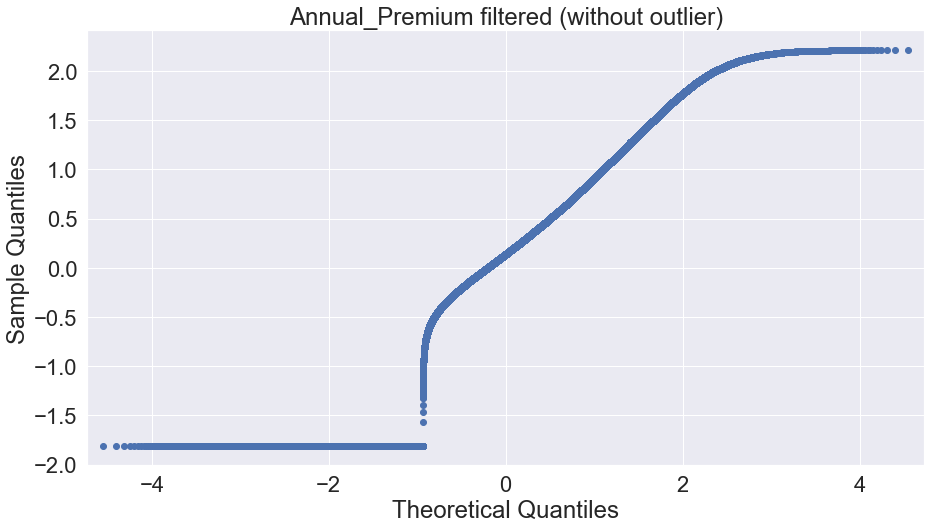

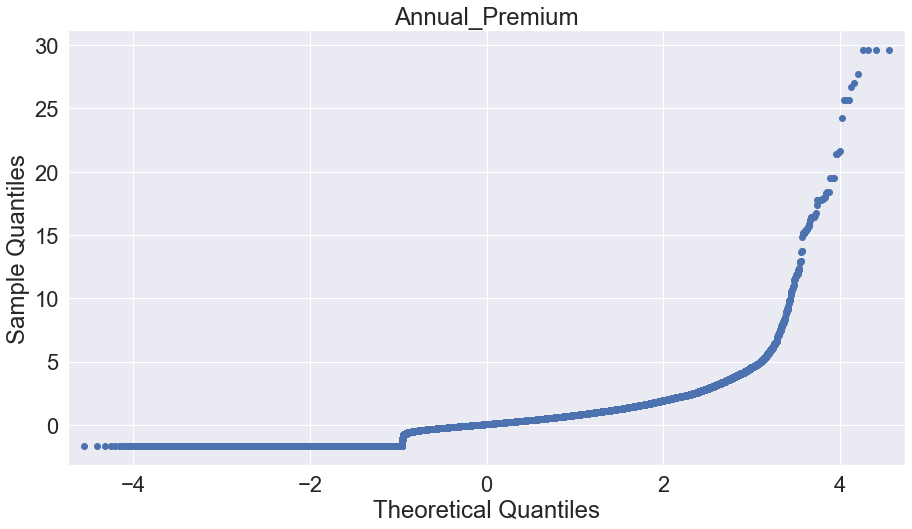

In [36]:
import statsmodels.api as sm
import scipy.stats as stats 

plt.rcParams['figure.figsize'] = (15,8)
sns.set(font_scale=2)

sm.qqplot(df_i['Annual_Premium'],fit=True,dist=stats.norm)
plt.title("Annual_Premium filtered (without outlier)")

sm.qqplot(df['Annual_Premium'],fit=True,dist=stats.norm)
plt.title("Annual_Premium")
plt.show()

Berdasarkan hasil analisis outlier menggunakan IQR dan QQ-Plot bahwasanya Outlier nya merupakan collective outlier yaitu outlier masih wajar terjadi di dunia nyata ketika Annual Premium tiap nasabah berbeda-beda tergantung beberapa variabel lainnya, ini bisa dianalisis lebih lanjut jika dibutuhkan.

## 3. Split Data, Feature Selection & Feature Extraction

Terlebih dahulu kita memilih fitur yang akan kita pakai di model.

### Feature Selection & Extraction:
a. Berdasarkan hasil uji statistik di atas kami menyimpulkan untuk hanya membuang kolom ID karena kolom ini hanya merepresentasikan id dari customer.<br>
b. Kami juga akan drop kolom Policy_Sales_Channel dan Region_Code
c. Kolom Vintage juga tidak akan digunakan karena customer masih ada di bawah 1 tahun dan juga berdistribusi uniform, kolom vintage bisa sangat berguna pada nyatanya jika data memiliki nilai lebih dari setahun sebagai perbandingan. Namun pada case ini, vintage tidak terlalu berguna.<br>


In [37]:
feature_predictor = df.drop(["id","Policy_Sales_Channel","Region_Code", "Response", "Vintage", "Top_Region", "Top_Sales", "Top_Region_Name", "Top_Sales_Name"],axis=1).columns

In [38]:
feature_predictor

Index(['Gender', 'Age', 'Driving_License', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage', 'Annual_Premium'],
      dtype='object')

In [39]:
#set variabel feature & target for modelling
X = df[feature_predictor].copy()
y = df["Response"].astype(int)

### Split Data:

Kita split terlebih dahulu data train dan data test sebelum diprocessing agar tidak terjadi data leakage.

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.2, random_state=42)

## 4. Feature Encoding dan Transformation With Pipeline

In [41]:
#Ordinal Encoder
cat_var = ['Previously_Insured', 'Driving_License','Gender','Vehicle_Damage','Vehicle_Age']
ordinal_encoder = OrdinalEncoder(categories = [[0,1], [0,1],["Male","Female"], ['No','Yes'],
                                               ['< 1 Year','1-2 Year','> 2 Years']])
ordinal_pipe = Pipeline([('ordinal_encoder', ordinal_encoder)])

#Numeric transformation
num_var = ['Annual_Premium','Age']
scaler = StandardScaler()
power = PowerTransformer(method='yeo-johnson')
numeric_pipe = Pipeline([
    ('scaler', scaler),
    ('power', power)])

In [42]:
preprocessor = ColumnTransformer([
    ('numeric_pipe', numeric_pipe, num_var),
    ('ordinal_pipe', ordinal_pipe, cat_var)])

In [43]:
from sklearn import set_config
set_config(display='diagram')
preprocessor

ColumnTransformer(transformers=[('numeric_pipe',
                                 Pipeline(steps=[('scaler', StandardScaler()),
                                                 ('power',
                                                  PowerTransformer())]),
                                 ['Annual_Premium', 'Age']),
                                ('ordinal_pipe',
                                 Pipeline(steps=[('ordinal_encoder',
                                                  OrdinalEncoder(categories=[[0,
                                                                              1],
                                                                             [0,
                                                                              1],
                                                                             ['Male',
                                                                              'Female'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['< '
                                                                              '1 '
                                                                              'Year',
                                                                              '1-2 '
                                                                              'Year',
                                                                              '> '
                                                                              '2 '
                                                                              'Years']]))]),
                                 ['Previously_Insured', 'Driving_License',
                                  'Gender', 'Vehicle_Damage', 'Vehicle_Age'])])

Mengecek Output hasil dari encoding dan transformasi pada X_train dan X_test

In [44]:
X_train_encoding = preprocessor.fit_transform(X_train)
X_test_encoding = preprocessor.transform(X_test)

In [45]:
X_train_encoding = preprocessor.fit_transform(X_train)
X_test_encoding = preprocessor.transform(X_test)
X_train_encoding = pd.DataFrame(X_train_encoding, columns= num_var + cat_var)
X_test_encoding = pd.DataFrame(X_test_encoding, columns= num_var + cat_var)

In [46]:
X_test_encoding.head()

,Annual_Premium,Age,Previously_Insured,Driving_License,Gender,Vehicle_Damage,Vehicle_Age
0,2.393436,1.045783,0.0,1.0,0.0,1.0,2.0
1,-0.615335,-0.847028,0.0,1.0,1.0,1.0,1.0
2,1.715103,-0.946337,0.0,1.0,0.0,1.0,0.0
3,-1.740161,-0.562027,0.0,1.0,0.0,1.0,1.0
4,1.198958,-0.654843,0.0,1.0,1.0,1.0,0.0


## 5. Handle Class Imbalance
Untuk handle class imbalance kami akan menggunakan metode Class Weight yang parameternya ada pada model Machine Learning sehingga akan ditunjukkan di Stage 3 nantinya. Alasan kami menggunakan Class Weight adalah karena Class Weight ketika di dalam algoritma modelnya akan memberikan kesempatan lebih kepada kelas minoritas sehingga dapat memberikan penalti yang lebih tinggi kepada kelas minoritas dan algoritme dapat fokus pada pengurangan kesalahan untuk kelas minoritas.<br>
[Terkait Class Weight Parameter](https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights/)

## 6. Fitur Tambahan

### **Ide untuk feature tambahan yang dapat membantu performansi model lebih bagus:**
1. Feature Vintage (lamanya customer dalam ber-Asuransi) lebih dari setahun, feature tersebut berguna untuk melihat berdasarkan lamanya customer dalam ber Asuransi apakah berpengaruh terhadap Response nya untuk membeli Asuransi Kendaraan juga.

Dengan asumsi bahwa semua nasabah memiliki kendaraan, maka fitur berikut bisa ditambahkan 

2. Varibel Loan (apakah nasabah memiliki pinjaman atau tidak), hal ini bisa saja berpengaruh terhadap keputusan nasabah apakah akan menggunakan Asuransi Kendaraan atau tidak. Tentunya akan menjadi pertimbangan mengingat ada biaya tambahan yang harus dikeluarkan untuk menggunakan Asuransi Kendaraan

3. Jumlah tanggungan keluarga, hal ini bisa menjadi pertimbangan bagi nasabah apakah akan memutuskan menggunakan Asuransi Kendaraan atau tidak karena akan ada biaya tambahan yang harus dikeluarkan 

4. Jenis Pekerjaan, variabel ini akan melihat pengaruh jenis pekerjaan terhadap keputusan mnasabah enggunakan Asuransi Kendaraan. Akan dilihat dari jenia pekerjaan mana yang memiliki sumbangsih paling tinggi untuk jumlah nasabah yang tertarik menggunakan Asuransi Kendaraan.

5. Jenis Kendaraan dan Merk Kendaraan, variabel ini berguna melihat pengaruh terhadap keputusan nasabah akan menggunakan Asuransi Kendaraan atau tidak. Nantinya akan diliat jenis kendaraan (Misal Hatchback, MPV, SUV dll) segment mana yang banyak tertarik menggunakan asuransi kendaraan dan akan dilihat pengaruhnya. Misal pada nasabah yang memiliki kendaraan mewah, tentunya hal ini menjadi pertimbangan menggunakan Asuransi Kendaraan untuk meningkatkan rasa aman dan nyaman mengingat harga kendaraannya sangat mahal dan pajaknya juga sangat tinggi.

6. Jumlah mobil yang dimiliki nasabah. Karena ketika nasabah memiliki banyak kendaraan, tentunya ada biaya lain yang perlu dikeluarkan dan menggunakan Asuransi Kendaraan akan menambah biaya. Oleh karena itu variabel ini cukup penting untuk melihat pengaruhnya terhadap keputusan nasabah menggunakan Asuransi Kendaraan


# Modelling (Machine Learning)

- Sebelum melakukan modelling, terlebih dahulu kita sedikit melakukan simulasi bisnis untuk nantinya menjadikan salah satu metrics penilaian sebagai metrics acuan dalam penentuan model yang akan kita pilih. Dalam kasus ini kita ingin meningkatkan Cross Selling Prediction dengan memaksimalkan potensial user yang ada yaitu dengan mengurangi False Negatif.<br>
- Karena ini adalah cross selling pertama kali dan fokus bisnis adalah mencari sebanyak-banyaknya customer yang tertarik terlebih dahulu sebelum lebih memperbaiki sistemnya maka tujuan kita adalah membuat model yang sekecil mungkin salah prediksi pada customer yang kemungkinan tertarik.<br>
- False Negative dikurangi karena kita ingin menghindari salah prediksi user yang tertarik namun dianggap tidak tertarik karena mereka adalah potential user mengingat target pada data ini juga imbalanced dengan Response "Tidak Tertarik" mempunyai nilai nilai yang jauh lebih tinggi dibanding user dengan Response "Tertarik".<br>
- Berdasarkan hal di atas, kita akan memfokuskan kepada metrics Recall dimana metrics Recall adalah perhitungan metrics yang menggunakan False Negative sebagai pembaginya, sehingga semakin kecil False Negative maka semakin besar nilai Recall nya, nantinya metrics Recall yang terbaik adalah yang akan kita pilih tentu saja setelah melihat nilai metrics ROC_AUC sebagai metrics yang mampu membedakan antar target berdasarkan threshold.

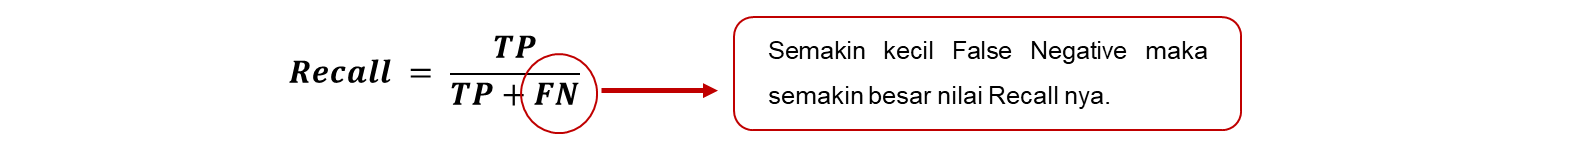

Kita akan memilih 5 model yang berbeda seperti berikut ini dikarenakan cara kerja model-model tersebut berbeda, kita ingin mengetahui model mana yang memiliki result terbaik untuk kemudian dioptimasi menggunakan hyperparameter tuning.

In [47]:
#assign model ke dalam variabel
models = [
    ['Logistic Regression', LogisticRegression(class_weight='balanced')],
    ['XGB', XGBClassifier(verbosity=0)],
    ['Decision Tree', DecisionTreeClassifier(class_weight='balanced', random_state=42)],
    ['Random Forest', RandomForestClassifier(class_weight='balanced', random_state=42)],
    ['Naive Bayes', GaussianNB()]
]

In [48]:
#modelling with scoring metrics
def cross_validation(model):
    model_name = []

    cv_recall_mean = []
    cv_recall_std = []
    training_recall = []
    
    cv_precision_mean = []
    cv_precision_std = []
    training_precision = []
    
    cv_f1_mean = []
    cv_f1_std = []
    training_f1 = []
    
    cv_roc_auc_mean = []
    cv_roc_auc_std = []
    training_roc_auc = []

    
    for name, model in models:
    
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('model', model)
        ]) 
        model_name.append(name)

        #scoring
        scoring= ['recall', 'precision', 'f1', 'roc_auc']
        
        #cross_validate 
        cv_score = cross_validate(pipeline, X_train, y_train, scoring=scoring, cv=5, n_jobs = -1)
        
        # training
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_train)
#         y_pred_proba = pipeline.predict_proba(X_test)
#         y_pred_proba_train = pipeline.predict_proba(X_train)
        
        training_recall.append(recall_score(y_train,y_pred))
        training_precision.append(precision_score(y_train, y_pred))
        training_f1.append(f1_score(y_train, y_pred))
        training_roc_auc.append(roc_auc_score(y_train, y_pred))
        
        #tes    
        cv_recall_mean.append(abs(cv_score['test_recall']).mean())
        cv_recall_std.append(abs(cv_score['test_recall']).std())
        cv_precision_mean.append(abs(cv_score['test_precision']).mean())
        cv_precision_std.append(abs(cv_score['test_precision']).std())
        cv_f1_mean.append(abs(cv_score['test_f1']).mean())
        cv_f1_std.append(abs(cv_score['test_f1']).std())
        cv_roc_auc_mean.append(abs(cv_score['test_roc_auc']).mean())
        cv_roc_auc_std.append(abs(cv_score['test_roc_auc']).std())
   
    return pd.DataFrame({
        'Model': model_name,
        'Training Recall' : training_recall,
        'CV Recall (mean)': cv_recall_mean,
        'CV Recall (std)': cv_recall_std,
        'Training Precision' : training_precision,
        'CV Precision (mean)' : cv_precision_mean,
        'CV Precision (std)' : cv_precision_std,
        'Training F1' : training_f1,
        'CV F1 (mean)' : cv_f1_mean,
        'CV F1 (std)' : cv_f1_std,
        'Training AUC_ROC' : training_roc_auc,
        'CV AUC_ROC (mean)' : cv_roc_auc_mean,
        'CV AUC_ROC (std)' : cv_roc_auc_std,
    })

In [49]:
%%time
cv_result = cross_validation(models)
cv_result

CPU times: total: 2min 8s
Wall time: 5min 7s


,Model,Training Recall,CV Recall (mean),CV Recall (std),Training Precision,CV Precision (mean),CV Precision (std),Training F1,CV F1 (mean),CV F1 (std),Training AUC_ROC,CV AUC_ROC (mean),CV AUC_ROC (std)
0,Logistic Regression,0.976290,0.976290,0.001177,0.250408,0.250415,0.000484,0.398584,0.398592,0.000591,0.784032,0.827928,0.001449
1,XGB,0.014531,0.007011,0.001214,0.789244,0.393760,0.026629,0.028537,0.013773,0.002352,0.506995,0.844271,0.000743
2,Decision Tree,0.983917,0.394214,0.003443,0.658930,0.269929,0.003438,0.789279,0.320437,0.003330,0.956389,0.622982,0.002455
3,Random Forest,0.980705,0.391485,0.004019,0.663030,0.273983,0.002134,0.791170,0.322353,0.002462,0.955542,0.771633,0.001500
4,Naive Bayes,0.975219,0.975219,0.001219,0.252147,0.252081,0.000450,0.400693,0.400610,0.000558,0.785596,0.816274,0.002032


Dari kesimpulan modelling yang dilakukan, kita akan memilih Logistic Regression untuk dilanjutkan ke tahap optimasi model karena Logistic Regression memiliki nilai ROC_AUC paling stabil antara CV dan training nya yang berarti kemampuan model dalam membedakan antar kelas pada target lebih baik dibanding yang lainnya dan model Logistic Regression juga memiliki nilai CV Recall score terbaik, sesuai penjelasan simulasi bisnis tadi bahwa kita akan memilih model dengan nilai recall score terbaik.

## Hyperparameter Tuning (Randomsearch)

Dari hasil cross validation pada model yang terpilih yaitu model Logistic Regression, didapatkan bahwa  score Recall dari Cross Validation dan data training sudah best fit namun tetap akan dioptimalkan menggunakan Tuning Hyperparameter 

In [50]:
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay

In [51]:
from sklearn import metrics

In [52]:
from sklearn.metrics import confusion_matrix

#### Hyptun Logistic Regression

In [53]:
%%time
#Hyptun Logistic Regression

logreg = LogisticRegression(class_weight = 'balanced')

pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('algo', logreg)
    ])

param_logreg = {'algo__penalty': ['elasticnet', 'l2'], # default 100
                'algo__C': [0.25, 0.5, 0.75, 1.0],
                'algo__fit_intercept' : [True,False]}


rs_logreg = RandomizedSearchCV(estimator=pipeline, param_distributions=param_logreg, scoring='recall', 
                               random_state=42, cv=10, n_jobs=-1, verbose=1)
rs_logreg.fit(X_train, y_train)

print(rs_logreg.best_params_)
print(rs_logreg.score(X_train, y_train), rs_logreg.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
{'algo__penalty': 'l2', 'algo__fit_intercept': False, 'algo__C': 0.75}
0.9770926996360523 0.977092707968638
CPU times: total: 12.8 s
Wall time: 1min 50s


Score before Hyperparameter Tuning Use Logreg
              precision    recall  f1-score   support

           0       0.99      0.59      0.74    267519
           1       0.25      0.98      0.40     37368

    accuracy                           0.64    304887
   macro avg       0.62      0.78      0.57    304887
weighted avg       0.90      0.64      0.70    304887

Score After Hyperparameter Tuning Use Logreg
              precision    recall  f1-score   support

           0       0.99      0.59      0.74    267519
           1       0.25      0.98      0.40     37368

    accuracy                           0.64    304887
   macro avg       0.62      0.78      0.57    304887
weighted avg       0.90      0.64      0.70    304887



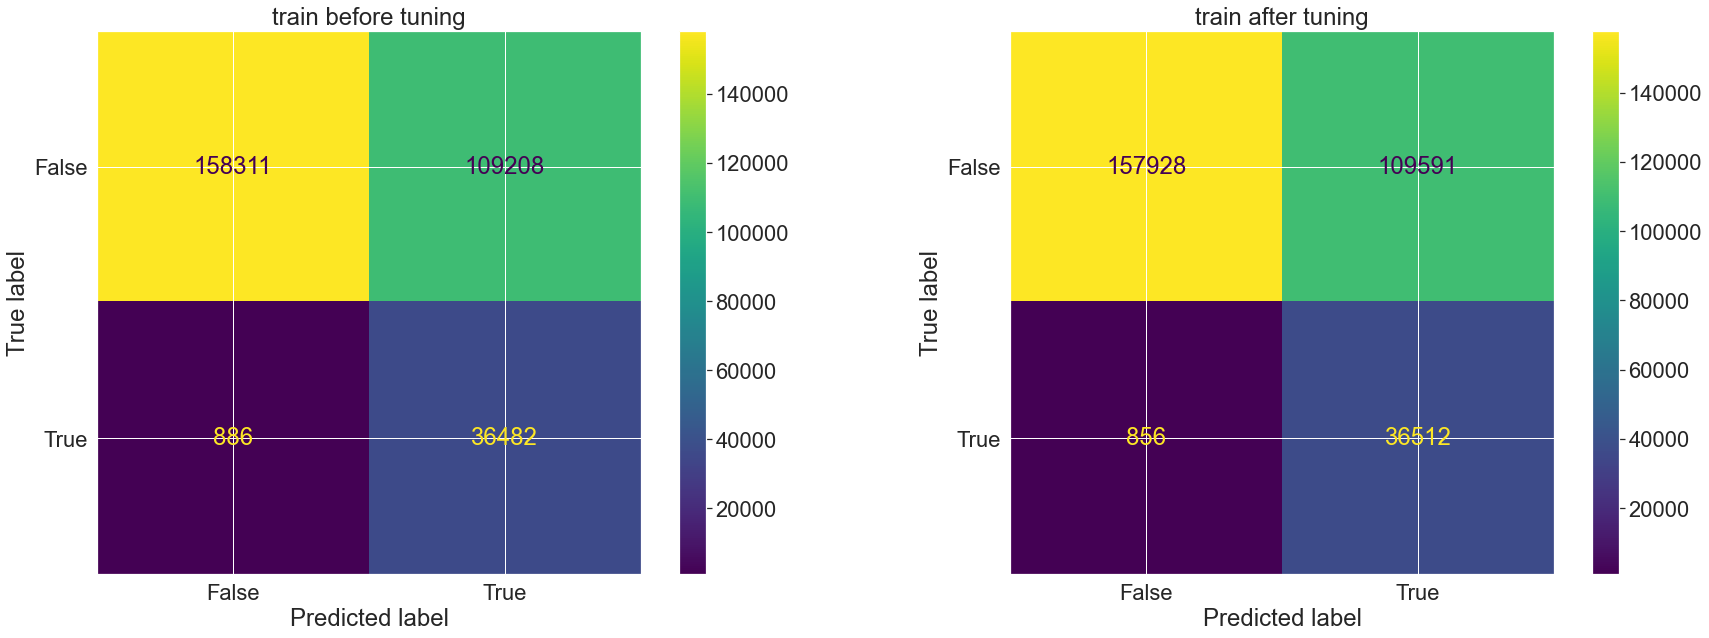

In [54]:
plt.rcParams['figure.figsize'] = (30,10)
sns.set(font_scale=2)
fig, ax = plt.subplots(1,2)
ax[0].set_title("train before tuning")
ax[1].set_title("train after tuning")

logreg = LogisticRegression(class_weight = 'balanced')
logreg.fit(X_train_encoding, y_train)
y_pred_train_logreg = logreg.predict(X_train_encoding)

logreg_rs = LogisticRegression(class_weight = 'balanced', penalty = 'l2', fit_intercept = False, C = 0.75)
logreg_rs.fit(X_train_encoding, y_train)
y_pred_train_logreg_rs = logreg_rs.predict(X_train_encoding)

print("Score before Hyperparameter Tuning Use Logreg")
print(metrics.classification_report(y_train,y_pred_train_logreg))
metrics.ConfusionMatrixDisplay(
confusion_matrix = metrics.confusion_matrix(y_train, y_pred_train_logreg), 
display_labels = [False, True]).plot(ax=ax[0])

print("Score After Hyperparameter Tuning Use Logreg")
print(metrics.classification_report(y_train,y_pred_train_logreg_rs))
metrics.ConfusionMatrixDisplay(
confusion_matrix = metrics.confusion_matrix(y_train, y_pred_train_logreg_rs), 
display_labels = [False, True]).plot(ax=ax[1]);

In [55]:
logreg_rs = LogisticRegression(class_weight = 'balanced', penalty = 'l2', fit_intercept = False, C = 0.75)
logreg_rs.fit(X_train_encoding, y_train)
y_pred_train_logreg_rs = logreg_rs.predict(X_train_encoding)
print("ROC_AUC Train After Tuning :", roc_auc_score(y_train, y_pred_train_logreg_rs))

ROC_AUC Train After Tuning : 0.7837179077260625


- Dari hasil hyptun model Logistic Regression kita bisa mendapatkan Recall score mencapai 98%, kita akan melihat hasilnya pada grafik confusion matrix
- Dapat kita lihat FN berhasil kita kurangi, dimana setelah tunning hyperparameter jumlah FN sampai mencapai 856 orang atau sekitar 0.28% pada data Train. 

#### Tuning Threshold - LOGREG

Kita akan mencari best treshold yang bisa kita capai menggunakan G-mean sebagai salah satu cara tuning treshold.

[Tuning Treshold for Imbalanced Data](https://towardsdatascience.com/optimal-threshold-for-imbalanced-classification-5884e870c293)

In [56]:
import plotnine
from plotnine import ggplot
from plotnine.data import economics
from plotnine import ggplot, aes, geom_line, geom_point

# Import module for data manipulation
import pandas as pd
# Import module for linear algebra
import numpy as np
# Import module for data simulation
from sklearn.datasets import make_classification     # Create a synthetic dataframee
from sklearn.metrics import roc_curve                # Calculate the ROC curve
from sklearn.metrics import precision_recall_curve   # Calculate the Precision-Recall curve
from sklearn.metrics import f1_score                 # Calculate the F-score
# Import module for data visualization
from plotnine import *
import plotnine

In [57]:
# Create the ROC curve
logreg_rs = LogisticRegression(class_weight = 'balanced', penalty = 'l2', fit_intercept = False, C = 0.75)
logreg_rs.fit(X_train_encoding, y_train)
y_pred_train_logreg_rs = logreg_rs.predict(X_train_encoding)

fpr, tpr, thresholds = roc_curve(y_train, logreg_rs.predict_proba(X_train_encoding)[:,1])
roc_auc_value = roc_auc_score(y_train, logreg_rs.predict_proba(X_train_encoding)[:,1]).round(4)
gini_value = ((2*roc_auc_value)-1).round(4)

print('AUC for Logistic Regression on val data: ', round(roc_auc_value*100, 2), '%')
print('Gini for Logistic Regression on val data: ', round(gini_value*100, 2), '%')
# Plot the ROC curve
df_fpr_tpr = pd.DataFrame({'FPR':fpr, 'TPR':tpr, 'Threshold':thresholds})
df_fpr_tpr.head()

AUC for Logistic Regression on val data:  82.67 %
Gini for Logistic Regression on val data:  65.34 %


,FPR,TPR,Threshold
0,0.000000,0.00000,1.965999
1,0.000004,0.00000,0.965999
2,0.000019,0.00000,0.955704
3,0.000019,0.00008,0.954699
4,0.000142,0.00008,0.949444


Best Threshold: 0.6663 with G-Mean: 0.7643
FPR: 0.2919, TPR: 0.825


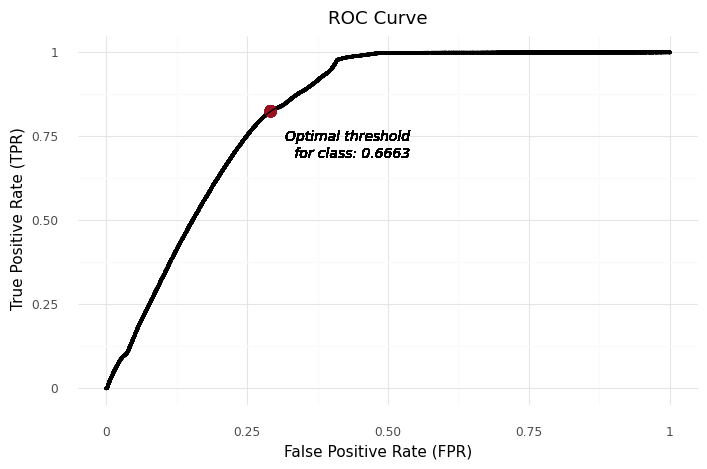

<ggplot: (127029521640)>

In [58]:
# Calculate the G-mean
gmean = np.sqrt(tpr * (1 - fpr))

# Find the optimal threshold
index = np.argmax(gmean)
thresholdOpt = round(thresholds[index], ndigits = 4)
gmeanOpt = round(gmean[index], ndigits = 4)
fprOpt = round(fpr[index], ndigits = 4)
tprOpt = round(tpr[index], ndigits = 4)
print('Best Threshold: {} with G-Mean: {}'.format(thresholdOpt, gmeanOpt))
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))

# Create data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_fpr_tpr)+
    geom_point(aes(x = 'FPR',
                   y = 'TPR'),
               size = 0.4)+
    # Best threshold
    geom_point(aes(x = fprOpt,
                   y = tprOpt),
               color = '#981220',
               size = 4)+
    geom_line(aes(x = 'FPR',
                  y = 'TPR'))+
    geom_text(aes(x = fprOpt,
                  y = tprOpt),
              label = 'Optimal threshold \n for class: {}'.format(thresholdOpt),
              nudge_x = 0.14,
              nudge_y = -0.10,
              size = 10,
              fontstyle = 'italic')+
    labs(title = 'ROC Curve')+
    xlab('False Positive Rate (FPR)')+
    ylab('True Positive Rate (TPR)')+
    theme_minimal()
)

Score Logreg before Tuning Threshold
              precision    recall  f1-score   support

           0       0.99      0.59      0.74     66880
           1       0.25      0.98      0.40      9342

    accuracy                           0.64     76222
   macro avg       0.62      0.78      0.57     76222
weighted avg       0.90      0.64      0.70     76222

Score Logreg after Tuning Threshold 0.6663 
              precision    recall  f1-score   support

           0       0.97      0.71      0.82     66880
           1       0.29      0.83      0.42      9342

    accuracy                           0.72     76222
   macro avg       0.63      0.77      0.62     76222
weighted avg       0.88      0.72      0.77     76222



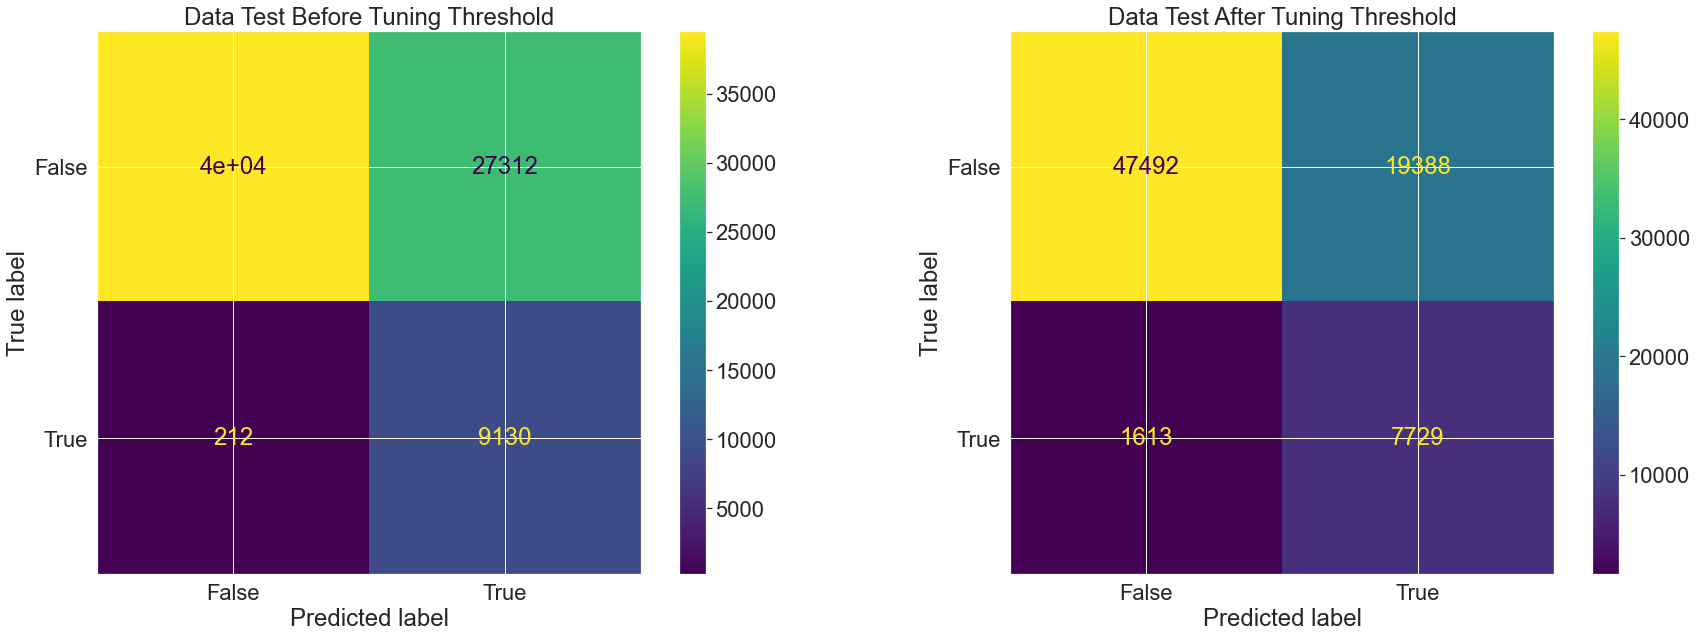

In [59]:
threshold = 0.6663 
plt.rcParams['figure.figsize'] = (30,10)
sns.set(font_scale=2)
fig, ax = plt.subplots(1,2)
ax[0].set_title("Data Test Before Tuning Threshold")
ax[1].set_title("Data Test After Tuning Threshold")

logreg_rs = LogisticRegression(class_weight = 'balanced', penalty = 'l2', fit_intercept = False, C = 0.75)
logreg_rs.fit(X_train_encoding, y_train)
y_pred_test_thr = np.where(logreg_rs.predict_proba(X_test_encoding)[:,1]>=threshold,1,0)
y_pred_test_logreg_rs = logreg_rs.predict(X_test_encoding)

print("Score Logreg before Tuning Threshold")
print(metrics.classification_report(y_test,y_pred_test_logreg_rs))
metrics.ConfusionMatrixDisplay(
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test_logreg_rs), 
display_labels = [False, True]).plot(ax=ax[0])

print("Score Logreg after Tuning Threshold 0.6663 ")
print(metrics.classification_report(y_test,y_pred_test_thr))
metrics.ConfusionMatrixDisplay(
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test_thr), 
display_labels = [False, True]).plot(ax=ax[1]);

In [60]:
logreg_rs = LogisticRegression(class_weight = 'balanced', penalty = 'l2', fit_intercept = False, C = 0.75)
logreg_rs.fit(X_train_encoding, y_train)
y_pred_test_logreg_rs = logreg_rs.predict(X_test_encoding)
print("ROC_AUC Test After Tuning :", roc_auc_score(y_test, y_pred_test_logreg_rs))

ROC_AUC Test After Tuning : 0.7844667904068573


In [61]:
threshold = 0.6663 
logreg_rs = LogisticRegression(class_weight = 'balanced', penalty = 'l2', fit_intercept = False, C = 0.75)
logreg_rs.fit(X_train_encoding, y_train)
y_pred_test_thr = np.where(logreg_rs.predict_proba(X_test_encoding)[:,1]>=threshold,1,0)
print("ROC_AUC Test After Tuning HP + Threshold :", roc_auc_score(y_test, y_pred_test_thr))

ROC_AUC Test After Tuning HP + Threshold : 0.7687232775478136


- Hasil Recall setelah tuning threshold mengalami penurunan baik dari TP maupun jumlah FN nya 
- Oleh karena itu threshold yang digunakan dalam model logreg ini menggunakan threshold default = 0.5, dan tuning yang dilakukan cukup sampai hyperparameter saja

### Hyptun GNB MODEL

In [62]:
%%time
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('algo', nb)
    ])

param_grid_nb = {
    'algo__var_smoothing': np.logspace(0,-9, num=100)
}


nbModel_grid = RandomizedSearchCV(estimator=pipeline, param_distributions=param_grid_nb, verbose=1, cv=10, n_jobs=-1,scoring='recall')
nbModel_grid.fit(X_train, y_train)

print(nbModel_grid.best_params_)
print(nbModel_grid.score(X_train, y_train), nbModel_grid.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
{'algo__var_smoothing': 1.519911082952933e-06}
0.9752194390922715 0.9752462283238567
CPU times: total: 9.61 s
Wall time: 1min 12s


GNB Model - Score Before Hyperparameter Tuning
              precision    recall  f1-score   support

           0       0.99      0.60      0.75    267519
           1       0.25      0.98      0.40     37368

    accuracy                           0.64    304887
   macro avg       0.62      0.79      0.57    304887
weighted avg       0.90      0.64      0.70    304887

GNB Model - Score After Hyperparameter Tuning
              precision    recall  f1-score   support

           0       0.99      0.60      0.75    267519
           1       0.25      0.98      0.40     37368

    accuracy                           0.64    304887
   macro avg       0.62      0.79      0.57    304887
weighted avg       0.90      0.64      0.70    304887



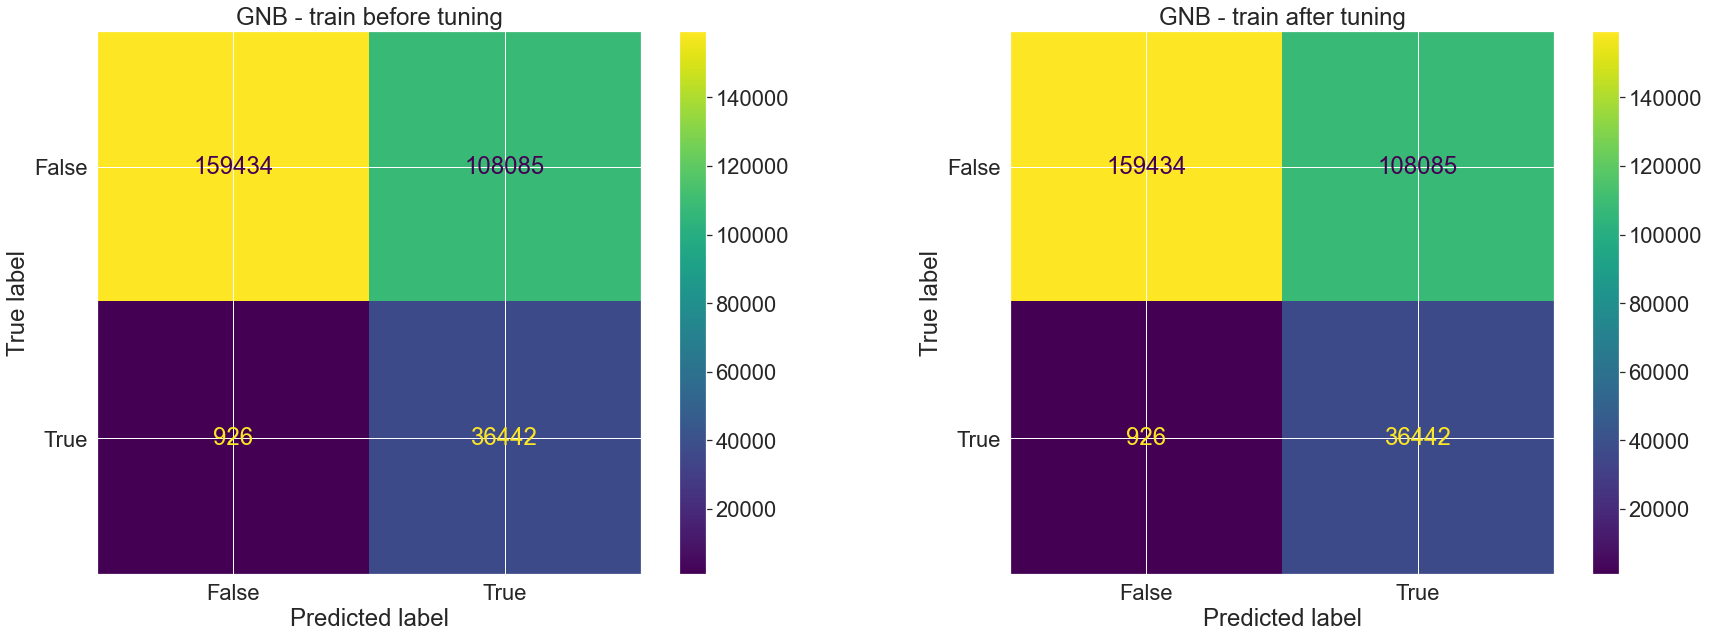

In [63]:
plt.rcParams['figure.figsize'] = (30,10)
sns.set(font_scale=2)
fig, ax = plt.subplots(1,2)
ax[0].set_title("GNB - train before tuning")
ax[1].set_title("GNB - train after tuning")

nb = GaussianNB()
nb.fit(X_train_encoding, y_train)
y_pred_train_nb = nb.predict(X_train_encoding)

nb_rs = GaussianNB(var_smoothing=1.873817422860383e-06)
nb_rs.fit(X_train_encoding, y_train)
y_pred_train_nb_rs = nb_rs.predict(X_train_encoding)

print("GNB Model - Score Before Hyperparameter Tuning")
print(metrics.classification_report(y_train,y_pred_train_nb))
metrics.ConfusionMatrixDisplay(
confusion_matrix = metrics.confusion_matrix(y_train, y_pred_train_nb), 
display_labels = [False, True]).plot(ax=ax[0])

print("GNB Model - Score After Hyperparameter Tuning")
print(metrics.classification_report(y_train,y_pred_train_nb_rs))
metrics.ConfusionMatrixDisplay(
confusion_matrix = metrics.confusion_matrix(y_train, y_pred_train_nb_rs), 
display_labels = [False, True]).plot(ax=ax[1]);

### Tuning Treshold - GNB

In [64]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_train,nb_rs.predict_proba(X_train_encoding)[:,1])
roc_auc_value = roc_auc_score(y_train, nb_rs.predict_proba(X_train_encoding)[:,1]).round(4)
gini_value = ((2*roc_auc_value)-1).round(4)

print('AUC for Logistic Regression on val data: ', round(roc_auc_value*100, 2), '%')
print('Gini for Logistic Regression on val data: ', round(gini_value*100, 2), '%')



AUC for Logistic Regression on val data:  81.63 %
Gini for Logistic Regression on val data:  63.26 %


In [65]:
# Create the ROC curve
nb_rs = GaussianNB(var_smoothing=1.873817422860383e-06)
nb_rs.fit(X_train_encoding, y_train)
y_pred_train_nb_rs = nb_rs.predict(X_train_encoding)

fpr, tpr, thresholds = roc_curve(y_train, nb_rs.predict_proba(X_train_encoding)[:,1])
roc_auc_value = roc_auc_score(y_train, nb_rs.predict_proba(X_train_encoding)[:,1]).round(4)
gini_value = ((2*roc_auc_value)-1).round(4)

print('AUC for GNB  on val data: ', round(roc_auc_value*100, 2), '%')
print('Gini for GNB on val data: ', round(gini_value*100, 2), '%')
# Plot the ROC curve
df_fpr_tpr = pd.DataFrame({'FPR':fpr, 'TPR':tpr, 'Threshold':thresholds})
df_fpr_tpr.head()

AUC for GNB  on val data:  81.63 %
Gini for GNB on val data:  63.26 %


,FPR,TPR,Threshold
0,0.000000,0.000000,2.0
1,0.000004,0.000000,1.0
2,0.000004,0.000054,1.0
3,0.000026,0.000054,1.0
4,0.000026,0.000080,1.0


Best Threshold: 0.7473 with G-Mean: 0.7824
FPR: 0.3268, TPR: 0.9093


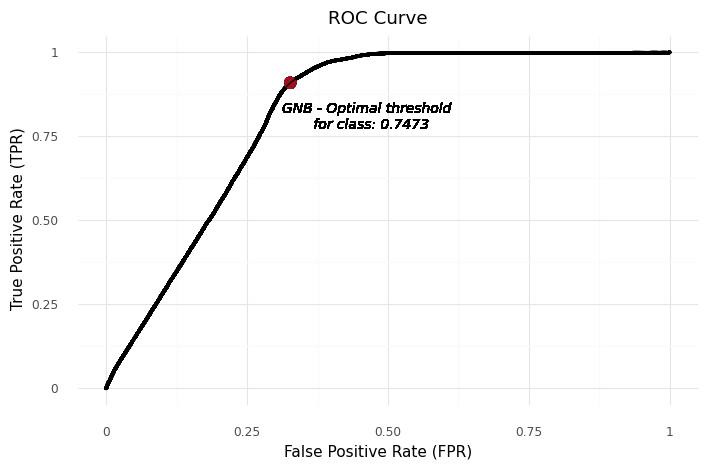

<ggplot: (127029731325)>

In [66]:
# Calculate the G-mean
gmean = np.sqrt(tpr * (1 - fpr))

# Find the optimal threshold
index = np.argmax(gmean)
thresholdOpt = round(thresholds[index], ndigits = 4)
gmeanOpt = round(gmean[index], ndigits = 4)
fprOpt = round(fpr[index], ndigits = 4)
tprOpt = round(tpr[index], ndigits = 4)
print('Best Threshold: {} with G-Mean: {}'.format(thresholdOpt, gmeanOpt))
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))

# Create data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_fpr_tpr)+
    geom_point(aes(x = 'FPR',
                   y = 'TPR'),
               size = 0.4)+
    # Best threshold
    geom_point(aes(x = fprOpt,
                   y = tprOpt),
               color = '#981220',
               size = 4)+
    geom_line(aes(x = 'FPR',
                  y = 'TPR'))+
    geom_text(aes(x = fprOpt,
                  y = tprOpt),
              label = 'GNB - Optimal threshold \n for class: {}'.format(thresholdOpt),
              nudge_x = 0.14,
              nudge_y = -0.10,
              size = 10,
              fontstyle = 'italic')+
    labs(title = 'ROC Curve')+
    xlab('False Positive Rate (FPR)')+
    ylab('True Positive Rate (TPR)')+
    theme_minimal()
)

Score GNB before Tuning Threshold
              precision    recall  f1-score   support

           0       0.99      0.60      0.75     66880
           1       0.25      0.98      0.40      9342

    accuracy                           0.64     76222
   macro avg       0.62      0.79      0.57     76222
weighted avg       0.90      0.64      0.70     76222

Score GNB after Tuning Threshold 0.6663 
              precision    recall  f1-score   support

           0       0.99      0.60      0.75     66880
           1       0.25      0.98      0.40      9342

    accuracy                           0.64     76222
   macro avg       0.62      0.79      0.57     76222
weighted avg       0.90      0.64      0.70     76222



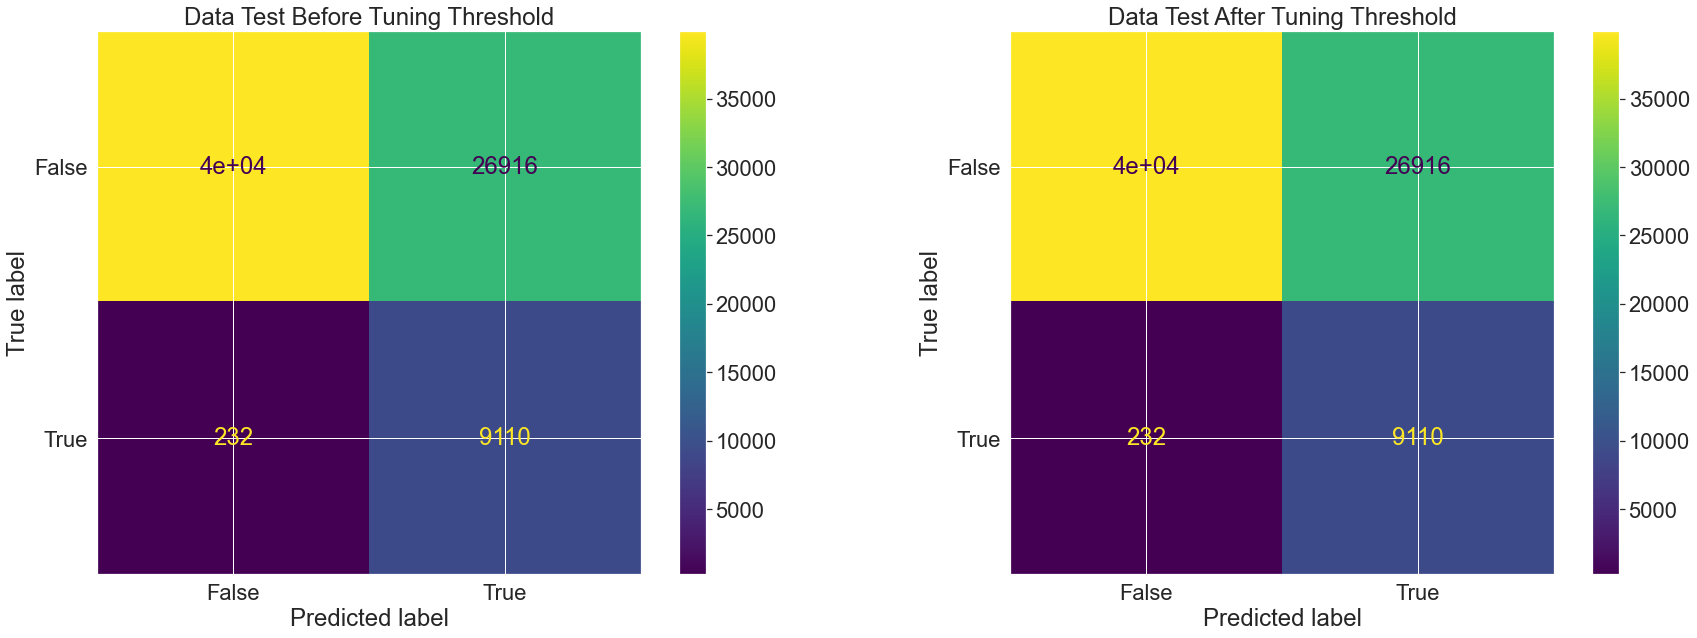

In [67]:
threshold = 0.7473 
plt.rcParams['figure.figsize'] = (30,10)
sns.set(font_scale=2)
fig, ax = plt.subplots(1,2)
ax[0].set_title("Data Test Before Tuning Threshold")
ax[1].set_title("Data Test After Tuning Threshold")

nb_rs = GaussianNB(var_smoothing=1.873817422860383e-06)
nb_rs.fit(X_train_encoding, y_train)
y_pred_test_thr = np.where(nb_rs.predict_proba(X_test_encoding)[:,1]>=threshold,1,0)
y_pred_test_nb_rs = nb_rs.predict(X_test_encoding)

print("Score GNB before Tuning Threshold")
print(metrics.classification_report(y_test,y_pred_test_nb_rs))
metrics.ConfusionMatrixDisplay(
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test_nb_rs), 
display_labels = [False, True]).plot(ax=ax[0])

print("Score GNB after Tuning Threshold 0.6663 ")
print(metrics.classification_report(y_test,y_pred_test_nb_rs))
metrics.ConfusionMatrixDisplay(
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test_nb_rs), 
display_labels = [False, True]).plot(ax=ax[1]);

- Hasil Recall setelah tuning threshold tidak mengalami perubahan sama sekali pada model GNB ini, sehingga tuning cukup sampai Hyperparameter saja 

### Cummulative Gain Curve

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

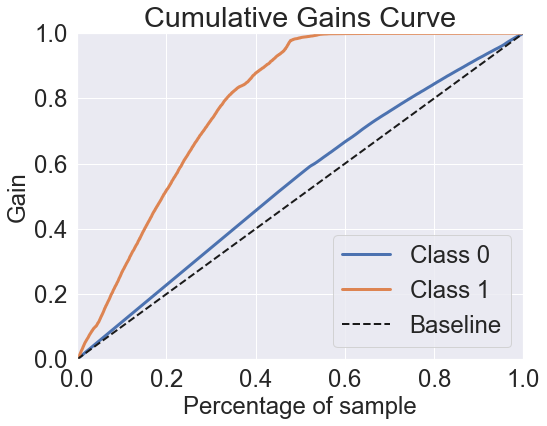

In [68]:
import scikitplot as skplt

skplt.metrics.plot_cumulative_gain(y_test,rs_logreg.predict_proba(X_test), title='Cumulative Gains Curve', ax=None, figsize=(8,6), title_fontsize='large', text_fontsize='medium')

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

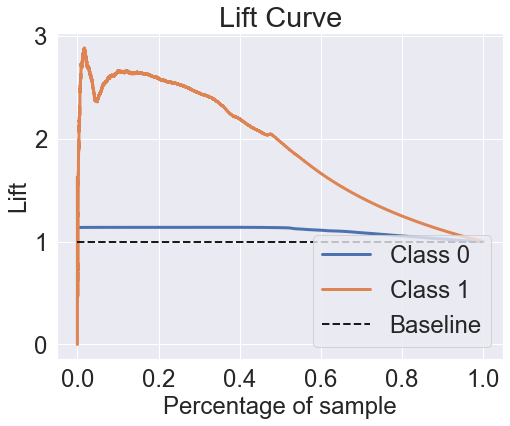

In [69]:
skplt.metrics.plot_lift_curve(y_test,rs_logreg.predict_proba(X_test), title='Lift Curve', ax=None, figsize=(8,6), title_fontsize='large', text_fontsize='medium')

1. Model mampu mengcapture 90% customer yang Tertarik pada 40% Populasi data.
2. Pada 40% data, model memiliki performa 2.2 kali lipat dibandingkan dengan random choice

# Feature Importance

In [70]:
logreg_final = LogisticRegression(penalty='l2', fit_intercept = False, C = 0.75,class_weight = 'balanced')
logreg_final.fit(X_train_encoding, y_train)
prediction = logreg_final.predict(X_test_encoding)
features = X_test_encoding
importance = logreg_final.coef_[0]
feature_names = features.columns.values

In [71]:
feature_imp = pd.DataFrame(zip(feature_names, importance), columns=['Features', 'Importance Score'])
feature_imp = feature_imp.sort_values(by='Importance Score', ascending=True)

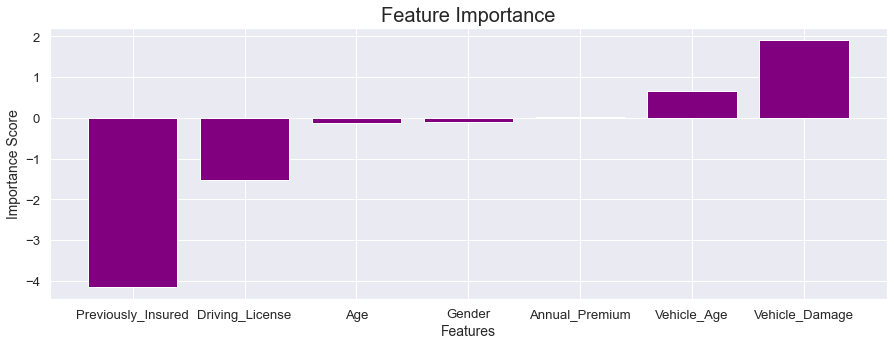

In [72]:
plt.rcParams['figure.figsize'] = (15,5)
sns.set(font_scale=1.2)
plt.bar(feature_imp['Features'], feature_imp['Importance Score'], color = 'Purple')
plt.title("Feature Importance", fontsize = 20)
plt.xlabel("Features",fontsize = 14)
plt.ylabel("Importance Score",fontsize = 14)
# plt.xticks(rotation=45)
plt.show()

- Ada beberapa feature yang paling berpengaruh dari model yang dihasilkan menggunakan Logistic Regression. Fitur Vehicle Damage dan Vehicle Age merupakan 2 fitur paling penting
- Hal ini menggambarkan bahwa Kondisi Kendaraan nasabah (Rusak atau tidaknya) dan usia kendaraan nasabah berpengaruh terhadap keputusan nasabah dalam menggunakan asuransi kendaraan. 


In [73]:
import shap

Untuk melihat pengaruh feature akan dilihat menggunakan Shap Values

In [74]:
alpha = 0.05
sampel = X_test_encoding.shape[0]/(1+X_test_encoding.shape[0]*alpha*alpha)
print("Jumlah Sample minimal :",round(sampel))

Jumlah Sample minimal : 398


In [75]:
X_test_sample = X_test_encoding.sample(1000, random_state=42)
explainer = shap.KernelExplainer(logreg_rs.predict_proba, link='logit', data=X_test_sample)
shap_values = explainer.shap_values(X_test_sample)

Using 1000 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/1000 [00:00<?, ?it/s]

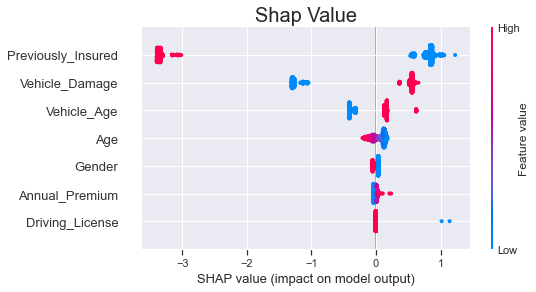

In [76]:
plt.title("Shap Value", fontsize = 20)
shap.summary_plot(shap_values[1], X_test_sample, color=['Purple','Orange'])

**1. Insight Business**
- Pada Shap Value terlihat bahwa jika seorang nasabah pernah menggunakan asuransi kendaraan, semakin menyebabkan nasabah tersebut tidak mau mengambil asuransi kendaraan
- Kemudian jika nasabah yang memiliki kondisi kendaraan rusak maka semakin menyebabkan nasabah tersebut ingin menggunakan asuransi kendaraan

**2. Rekomendasi Bisnis**
Berdasarkan hal tersebut berikut rekomendasi bisnis untuk perusahaan asuransi berdasarkan insight yang didapat dari hasil model dan business insight
- Perusahaan dapat memfokuskan pada nasabah yang sebelumnya belum memiliki Asuransi Kendaraan dan kondisi kendaraannya rusak
- Menggunakan top 10 jenis Policy_Sales_Channel sebagai media promosinya.
- Perusahaan dapat memfokuskan pada beberapa Region yang memiliki nasabah dengan ketertarikan Asuransi Kendaraan paling banyak dibandingkan Region lain.
- Memfokuskan promosi ke user dengan rentang umur 33-52 tahun dan pernah mengalami kerusakan pada kendaraannya serta umur kendaraannya berada pada 1-2 tahun.